# Bike rides in Gdansk in 2019

#### Loading libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import folium as fl
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels
warnings.filterwarnings("ignore")

#### Definition

In [2]:
seasons = {'Spring':[3,4,5],'Summer':[6,7,8],'Autumn':[9,10,11],'Winter':[1,2,12]}
seasons_number = {1:'Spring',2:'Summer',3:'Autumn',0:'Winter'}

def seasons_def(x):
    for key, value in seasons.items():
        if x in value:
            return (key)
def seasons_number_def(x):
    for key, value in seasons_number.items():
        if x in value:
            return (key)

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(18,10)

<hr>

# Data preparation
## GDANSK - ANALYSIS AND MODIFICATION OF RECEIVED DATA

### Description of the data on journeys received from Gdansk
8760 observations (records) in 32 series (there is data in 25 measurement points).  
SERIES (columns): 
 - 'Time', '002 Al. Zwycięstwa', 'Wita Stwosza_do Wrzeszcza', '001 Pas Nadmorski', 'Wita Stwosza_do Oliwy', '023 Wita Stwosza', '004 Grunwaldzka_Wrzeszcz', '014 Havla / Armii Krajowej', '005 Błędnik', 'Grunwaldzka_Uniwersytet', '021 Żołnierzy Wyklętych', '015 Łostowicka','006 Hallera', '010 Kanał Raduni', '022 Stryjewskiego','025 Sucharskiego', '024 Jana Pawła II', '026 Elbląska','017 Nowolipie', '016 Jaśkowa Dolina', '009 Kartuska','020 Opata Rybińskiego', '007 Chłopska', '011 Rzeczpospolitej','018 Kliniczna / Marynarki Polskiej', '019 Wyzwolenia','027 Karczemki - kładka nad obwodnicą', '028 Słowackiego','Gdańsk Wyspa Sobieszewska', '029 Adamowicza', 'Grunwaldzka_Alchemia','008 Grunwaldzka Alchemia / Uniwersytet']'  

NUMBER OF DATA GAPS:
 - 1 observation - no runs were recorded on all induction loops on 03/31/2019 at 02:00 (Saturday / Sunday night),
 - 79 observations - no crossings on the '027 Karczemki - footbridge over the bypass' loop were recorded from August 27, 2019 11:00 (Tuesday) to August 30, 2019 17:00 (Thursday) - probable damage to the system,
 - no 8760 data in the series 'Gdańsk Wyspa Sobieszewska', '029 Adamowicza', 'Grunwaldzka_Alchemia', '022 Stryjewskiego',
 - no data on 03/31/2019 at 02:00 was also recorded in Krakow, which may indicate, for example, a failure of the mobile network throughout the country.
 
COMPLETION OF GAPS:  
 - data series in which no journeys were recorded were deleted,
 - the average number of journeys between 2019-08-15 and 2019-09-15 was assumed on the relevant days of the week and hours on the measurement loop '027 Karczemki - footbridge over the bypass',
 - the number of journeys between 2019-03-15 and 2019-04-15 was averaged from Saturday to Sunday at 02:00 in individual measurement loops and updated Nan fields in all data series.

#### Loading the data

In [4]:
gdansk = pd.read_csv('data/Gdansk_bike.csv',encoding='Ansi', sep=';')

In [5]:
gdansk.columns

Index(['Time', '002 Al. Zwycięstwa', 'Wita Stwosza_do Wrzeszcza',
       '001 Pas Nadmorski', 'Wita Stwosza_do Oliwy', '023 Wita Stwosza',
       '004 Grunwaldzka_Wrzeszcz', '014 Havla / Armii Krajowej', '005 Błędnik',
       'Grunwaldzka_Uniwersytet', '021 Żołnierzy Wyklętych', '015 Łostowicka',
       '006 Hallera', '010 Kanał Raduni', '022 Stryjewskiego',
       '025 Sucharskiego', '024 Jana Pawła II', '026 Elbląska',
       '017 Nowolipie', '016 Jaśkowa Dolina', '009 Kartuska',
       '020 Opata Rybińskiego', '007 Chłopska', '011 Rzeczpospolitej',
       '018 Kliniczna / Marynarki Polskiej', '019 Wyzwolenia',
       '027 Karczemki - kładka nad obwodnicą', '028 Słowackiego',
       'Gdańsk Wyspa Sobieszewska', '029 Adamowicza', 'Grunwaldzka_Alchemia',
       '008 Grunwaldzka Alchemia / Uniwersytet'],
      dtype='object')

#### Changing the names of measurement loops

In [6]:
gdansk.rename(columns={'002 Al. Zwycięstwa':'Aleja_Zwyciestwa', 
                    'Wita Stwosza_do Wrzeszcza':'Wita_Stwosza_do_Wrzeszcza', 
                    '001 Pas Nadmorski':'Pas_Nadmorski',
                    'Wita Stwosza_do Oliwy':'Wita_Stwosza_do_Oliwy', 
                    '023 Wita Stwosza':'Wita_Stwosza', 
                    '004 Grunwaldzka_Wrzeszcz':'Grunwaldzka_Wrzeszcz',
                    '014 Havla / Armii Krajowej':'Havla_Armii_Krajowej', 
                    '005 Błędnik':'Blednik', 
                    '021 Żołnierzy Wyklętych':'Zolnierzy_Wykletych', 
                    '015 Łostowicka':'Lostowicka', 
                    '006 Hallera':'Hallera',
                    '010 Kanał Raduni':'Kanal_Raduni', 
                    '025 Sucharskiego':'Sucharskiego', 
                    '024 Jana Pawła II':'Jana_Pawla_II',
                    '026 Elbląska':'Elblaska', 
                    '017 Nowolipie':'Nowolipie',
                    '016 Jaśkowa Dolina':'Jaskowa_Dolina', 
                    '009 Kartuska':'Kartuska',
                    '020 Opata Rybińskiego':'Opata_Rybinskiego',
                    '007 Chłopska':'Chlopska', 
                    '011 Rzeczpospolitej':'Rzeczpospolitej',
                    '018 Kliniczna / Marynarki Polskiej':'Kliniczna', 
                    '019 Wyzwolenia':'Wyzwolenia',
                    '027 Karczemki - kładka nad obwodnicą':'Karczemki', 
                    '028 Słowackiego':'Slowackiego',
                    '008 Grunwaldzka Alchemia / Uniwersytet':'Grunwaldzka_Alchemia_UG'}
              ,inplace=True)

In [7]:
gdansk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60600 entries, 0 to 60599
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time                       60600 non-null  object 
 1   Aleja_Zwyciestwa           60592 non-null  float64
 2   Wita_Stwosza_do_Wrzeszcza  60491 non-null  float64
 3   Pas_Nadmorski              60593 non-null  float64
 4   Wita_Stwosza_do_Oliwy      60593 non-null  float64
 5   Wita_Stwosza               60593 non-null  float64
 6   Grunwaldzka_Wrzeszcz       60593 non-null  float64
 7   Havla_Armii_Krajowej       52674 non-null  float64
 8   Blednik                    52636 non-null  float64
 9   Grunwaldzka_Uniwersytet    52597 non-null  float64
 10  Zolnierzy_Wykletych        48306 non-null  float64
 11  Lostowicka                 52674 non-null  float64
 12  Hallera                    52674 non-null  float64
 13  Kanal_Raduni               52650 non-null  flo

#### Data limitation until 2019

In [8]:
gdansk.Time = pd.to_datetime(gdansk.Time, dayfirst=True)
gdansk = gdansk[(gdansk.Time.dt.year>2018)&(gdansk.Time.dt.year<2020)]
gdansk.shape

(8760, 32)

In [9]:
gdansk.head(3)

Time  Aleja_Zwyciestwa  Wita_Stwosza_do_Wrzeszcza  \
43824 2019-01-01 00:00:00              10.0                        0.0   
43825 2019-01-01 01:00:00              13.0                        2.0   
43826 2019-01-01 02:00:00               1.0                        0.0   

       Pas_Nadmorski  Wita_Stwosza_do_Oliwy  Wita_Stwosza  \
43824           24.0                    0.0           0.0   
43825           15.0                    0.0           2.0   
43826            0.0                    0.0           0.0   

       Grunwaldzka_Wrzeszcz  Havla_Armii_Krajowej  Blednik  \
43824                   1.0                   3.0      5.0   
43825                   5.0                   1.0      4.0   
43826                   0.0                   0.0      1.0   

       Grunwaldzka_Uniwersytet  ...  Chlopska  Rzeczpospolitej  Kliniczna  \
43824                      1.0  ...       2.0              8.0        1.0   
43825                      2.0  ...       6.0              1.0        1.0   
43826                      1.0  ...       1.0              0.0        0.0   

       Wyzwolenia  Karczemki  Slowackiego  Gdańsk Wyspa Sobieszewska  \
43824         2.0        0.0          0.0                        NaN   
43825         1.0        1.0          0.0                        NaN   
43826         0.0        0.0          0.0                        NaN   

       029 Adamowicza  Grunwaldzka_Alchemia  Grunwaldzka_Alchemia_UG  
43824             NaN                   NaN                      1.0  
43825             NaN                   NaN                      2.0  
43826             NaN                   NaN                      1.0  

[3 rows x 32 columns]

In [10]:
gdansk.isnull().sum()

Time                            0
Aleja_Zwyciestwa                1
Wita_Stwosza_do_Wrzeszcza       1
Pas_Nadmorski                   1
Wita_Stwosza_do_Oliwy           1
Wita_Stwosza                    1
Grunwaldzka_Wrzeszcz            1
Havla_Armii_Krajowej            1
Blednik                         1
Grunwaldzka_Uniwersytet         1
Zolnierzy_Wykletych             1
Lostowicka                      1
Hallera                         1
Kanal_Raduni                    1
022 Stryjewskiego               1
Sucharskiego                    1
Jana_Pawla_II                   1
Elblaska                        1
Nowolipie                       1
Jaskowa_Dolina                  1
Kartuska                        1
Opata_Rybinskiego               1
Chlopska                        1
Rzeczpospolitej                 1
Kliniczna                       1
Wyzwolenia                      1
Karczemki                      80
Slowackiego                     1
Gdańsk Wyspa Sobieszewska    8760
029 Adamowicza

### We remove series in which no events have been recorded

In [11]:
gdansk.drop(['Gdańsk Wyspa Sobieszewska','029 Adamowicza','Grunwaldzka_Alchemia','022 Stryjewskiego'],inplace=True,axis=1)

In [12]:
gdansk.set_index('Time',inplace=True)

In [13]:
gdansk[gdansk.Karczemki.isnull()]

Aleja_Zwyciestwa  Wita_Stwosza_do_Wrzeszcza  \
Time                                                               
2019-03-31 02:00:00               NaN                        NaN   
2019-08-27 11:00:00             234.0                       15.0   
2019-08-27 12:00:00             240.0                       10.0   
2019-08-27 13:00:00             318.0                       16.0   
2019-08-27 14:00:00             332.0                       14.0   
...                               ...                        ...   
2019-08-30 13:00:00             279.0                       11.0   
2019-08-30 14:00:00             345.0                       26.0   
2019-08-30 15:00:00             460.0                       27.0   
2019-08-30 16:00:00             494.0                       30.0   
2019-08-30 17:00:00             426.0                       24.0   

                     Pas_Nadmorski  Wita_Stwosza_do_Oliwy  Wita_Stwosza  \
Time                                                                      
2019-03-31 02:00:00            NaN                    NaN           NaN   
2019-08-27 11:00:00          388.0                    8.0          23.0   
2019-08-27 12:00:00          441.0                    8.0          18.0   
2019-08-27 13:00:00          425.0                    7.0          23.0   
2019-08-27 14:00:00          404.0                   16.0          30.0   
...                            ...                    ...           ...   
2019-08-30 13:00:00          307.0                   14.0          25.0   
2019-08-30 14:00:00          362.0                   19.0          45.0   
2019-08-30 15:00:00          365.0                   18.0          45.0   
2019-08-30 16:00:00          416.0                   21.0          51.0   
2019-08-30 17:00:00          452.0                   15.0          39.0   

                     Grunwaldzka_Wrzeszcz  Havla_Armii_Krajowej  Blednik  \
Time                                                                       
2019-03-31 02:00:00                   NaN                   NaN      NaN   
2019-08-27 11:00:00                 119.0                  36.0     95.0   
2019-08-27 12:00:00                 164.0                  44.0    123.0   
2019-08-27 13:00:00                 169.0                  49.0    155.0   
2019-08-27 14:00:00                 191.0                  48.0    174.0   
...                                   ...                   ...      ...   
2019-08-30 13:00:00                 199.0                  56.0    160.0   
2019-08-30 14:00:00                 179.0                  58.0    175.0   
2019-08-30 15:00:00                 282.0                  99.0    209.0   
2019-08-30 16:00:00                 318.0                 112.0    217.0   
2019-08-30 17:00:00                 317.0                 103.0    197.0   

                     Grunwaldzka_Uniwersytet  Zolnierzy_Wykletych  ...  \
Time                                                               ...   
2019-03-31 02:00:00                      NaN                  NaN  ...   
2019-08-27 11:00:00                    100.0                 36.0  ...   
2019-08-27 12:00:00                    113.0                 43.0  ...   
2019-08-27 13:00:00                    146.0                 38.0  ...   
2019-08-27 14:00:00                    175.0                 50.0  ...   
...                                      ...                  ...  ...   
2019-08-30 13:00:00                    126.0                 54.0  ...   
2019-08-30 14:00:00                    153.0                 43.0  ...   
2019-08-30 15:00:00                    252.0                 68.0  ...   
2019-08-30 16:00:00                    292.0                 62.0  ...   
2019-08-30 17:00:00                    255.0                 58.0  ...   

                     Jaskowa_Dolina  Kartuska  Opata_Rybinskiego  Chlopska  \
Time                                                                         
2019-03-31 02:00:00             NaN       NaN       

### Gaps in the data of the Karczemki series between 2019-08-27 11:00 - 2019-08-30 17:00
Visible cyclic runs through the measuring loop.  
The data was averaged between August 15, 2019 and September 15, 2019, referring to each day and each hour of travel.

In [14]:
#dane przed uśrednieniem
plt.title('Missing data - Gdansk - Karczemki')
_=gdansk['Karczemki'][(gdansk.index>'2019-08-15')&(gdansk.index<'2019-09-15')].plot()

### Data completion:

In [15]:
start_date = '2019-08-27 11:00'
end_date = '2019-08-30 17:00'

daterange = pd.date_range(start_date, end_date, freq='h')

for single_date in daterange:
    gdansk.loc[single_date,'Karczemki'] = round(gdansk['Karczemki'][(gdansk.index.dayofweek==single_date.dayofweek)&(gdansk.index.hour==int(single_date.strftime("%H")))&(gdansk.index>'2019-08-15')&(gdansk.index<'2019-09-15')].mean())       

### Data after averaging:

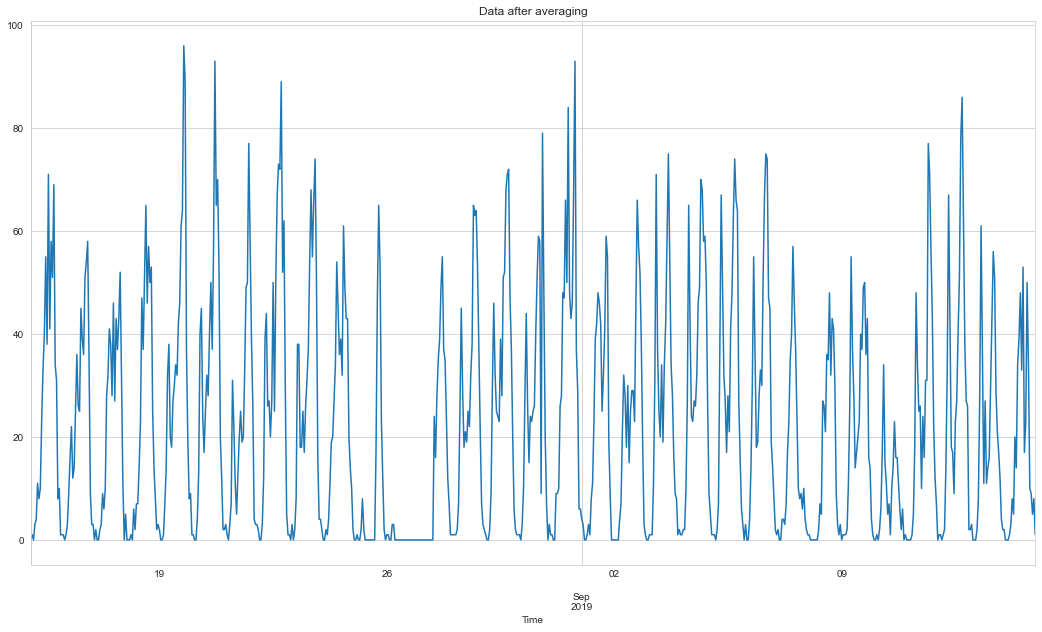

In [16]:
plt.title('Data after averaging')
_=gdansk['Karczemki'][(gdansk.index>'2019-08-15')&(gdansk.index<'2019-09-15')].plot()

### Other data gaps:

In [17]:
gdansk[gdansk.isnull().any(axis=1)]

Aleja_Zwyciestwa  Wita_Stwosza_do_Wrzeszcza  \
Time                                                               
2019-03-31 02:00:00               NaN                        NaN   

                     Pas_Nadmorski  Wita_Stwosza_do_Oliwy  Wita_Stwosza  \
Time                                                                      
2019-03-31 02:00:00            NaN                    NaN           NaN   

                     Grunwaldzka_Wrzeszcz  Havla_Armii_Krajowej  Blednik  \
Time                                                                       
2019-03-31 02:00:00                   NaN                   NaN      NaN   

                     Grunwaldzka_Uniwersytet  Zolnierzy_Wykletych  ...  \
Time                                                               ...   
2019-03-31 02:00:00                      NaN                  NaN  ...   

                     Jaskowa_Dolina  Kartuska  Opata_Rybinskiego  Chlopska  \
Time                                                                         
2019-03-31 02:00:00             NaN       NaN                NaN       NaN   

                     Rzeczpospolitej  Kliniczna  Wyzwolenia  Karczemki  \
Time                                                                     
2019-03-31 02:00:00              NaN        NaN         NaN        NaN   

                     Slowackiego  Grunwaldzka_Alchemia_UG  
Time                                                       
2019-03-31 02:00:00          NaN                      NaN  

[1 rows x 27 columns]

In [18]:
gdansk[(gdansk.index.dayofweek==6)&(gdansk.index.hour==2)&(gdansk.index>'2019-03-15')&(gdansk.index<'2019-04-15')].mean()

Aleja_Zwyciestwa             2.75
Wita_Stwosza_do_Wrzeszcza    1.25
Pas_Nadmorski                0.50
Wita_Stwosza_do_Oliwy        0.25
Wita_Stwosza                 1.50
Grunwaldzka_Wrzeszcz         2.50
Havla_Armii_Krajowej         0.25
Blednik                      2.50
Grunwaldzka_Uniwersytet      1.00
Zolnierzy_Wykletych          0.75
Lostowicka                   1.00
Hallera                      0.75
Kanal_Raduni                 0.50
Sucharskiego                 0.00
Jana_Pawla_II                1.50
Elblaska                     0.25
Nowolipie                    0.50
Jaskowa_Dolina               0.50
Kartuska                     1.00
Opata_Rybinskiego            2.00
Chlopska                     2.75
Rzeczpospolitej              2.25
Kliniczna                    1.25
Wyzwolenia                   0.00
Karczemki                    0.50
Slowackiego                  0.25
Grunwaldzka_Alchemia_UG      1.00
dtype: float64

### We average the number of journeys between 2019-03-15 and 2019-04-15 from Saturday to Sunday at 02:00:

In [19]:
for column in gdansk.columns:
    gdansk.loc['2019-03-31 02:00:00',column] = round(gdansk[column][(gdansk.index.dayofweek==6)&(gdansk.index.hour==2)&(gdansk.index>'2019-03-15')&(gdansk.index<'2019-04-15')].mean())

### ALL GAPS IN DATA HAVE BEEN REMOVED:

In [20]:
gdansk.isnull().sum()

Aleja_Zwyciestwa             0
Wita_Stwosza_do_Wrzeszcza    0
Pas_Nadmorski                0
Wita_Stwosza_do_Oliwy        0
Wita_Stwosza                 0
Grunwaldzka_Wrzeszcz         0
Havla_Armii_Krajowej         0
Blednik                      0
Grunwaldzka_Uniwersytet      0
Zolnierzy_Wykletych          0
Lostowicka                   0
Hallera                      0
Kanal_Raduni                 0
Sucharskiego                 0
Jana_Pawla_II                0
Elblaska                     0
Nowolipie                    0
Jaskowa_Dolina               0
Kartuska                     0
Opata_Rybinskiego            0
Chlopska                     0
Rzeczpospolitej              0
Kliniczna                    0
Wyzwolenia                   0
Karczemki                    0
Slowackiego                  0
Grunwaldzka_Alchemia_UG      0
dtype: int64

<hr>

## GDANSK - VISUALIZATION AND DESCRIPTION ANALYSIS

Number of cyclists' journeys through individual measurement loops in 2019

In [21]:
measuring_loop = pd.DataFrame(gdansk.sum())
measuring_loop = measuring_loop.sort_values(by=0,ascending=False)

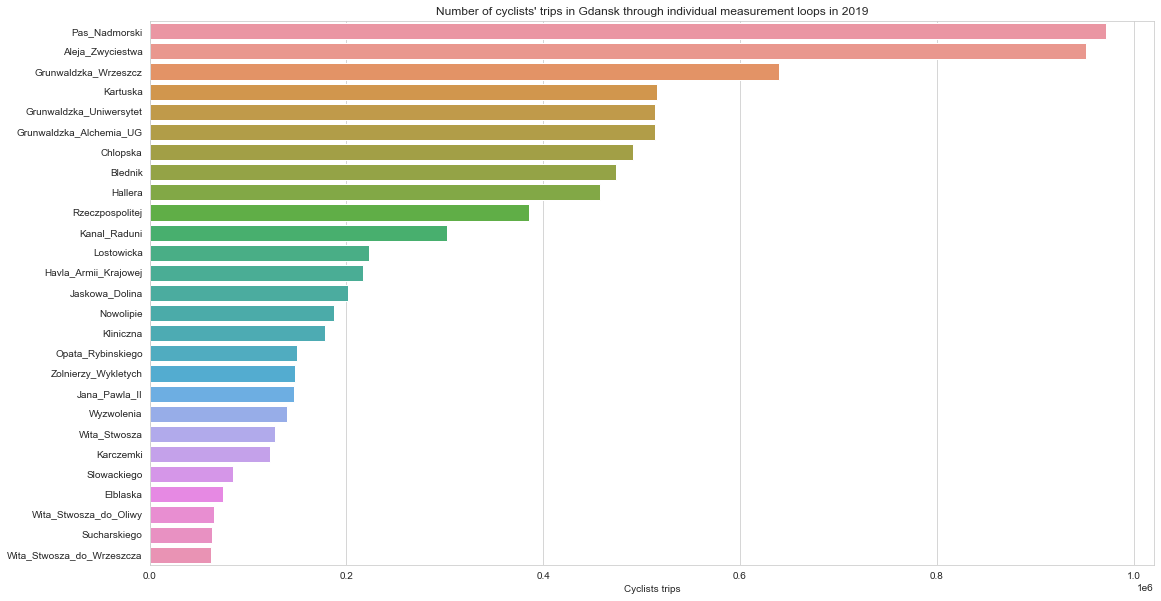

In [22]:
plt.title("Number of cyclists' trips in Gdansk through individual measurement loops in 2019")
sns.barplot(data = measuring_loop, y = measuring_loop.index, x = measuring_loop[0], orient='h', ci=None)
plt.xlabel('Cyclists trips')
plt.show()

In [23]:
# loading data coordinates
measuring = gpd.read_file('data/Gdansk_measurement_points.csv')

In [24]:
measuring

field_1                                             typ  \
0        0   licznik z wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlaczem   
1        1   licznik z wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlaczem   
2        2  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
3        3  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
4        4  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
5        5  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
6        6  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
7        7  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
8        8  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
9        9  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
10      10  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
11      11  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
12      12  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
13      13  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
14      14  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
15      15  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
16      16  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
17      17  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
18      18  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
19      19  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
20      20  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
21      21  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
22      22  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
23      23  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
24      24  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
25      25  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
26      26  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
27      27  licznik bez wyĂ„â€šĂ˘â‚¬ĹˇĂ„Ä…Ă˘â‚¬Ĺźwietlacza   
28      28                                        nieznany   
29      29                                        nieznany   
30      30                                        nieznany   

                   lokalizacj                 lat                 lon geometry  
0            3 Maja / Hucisko   54.35219901711042  18.642511045305955     None  
1        Grunwaldzka_Wrzeszcz   54.37802287553448  18.607837342592124     None  
2            Aleja_Zwyciestwa   54.37048824302968   18.62822561841608     None  
3       Wita_Stwosza_do Oliwy   54.39294320180563  18.575271967502346     None  
4               Pas_Nadmorski   54.41373221389774  18.622878066904985     None  
5                     Blednik    54.3582581394318  18.646126025950927     None  
6                   Siennicka  54.349637750661536  18.669106822091276     None  
7     Grunwaldzka_Uniwersytet   54.39965795782899  18.574844876640515     None  
8                     Hallera   54.37669338900466  18.623825964620085     None  
9        Havla_Armii_Krajowej   54.33765751778989   18.60059414268465     None  
10               Kanal_Raduni   54.34146555223159  18.641771437731343     None  
11                 Lostowicka   54.34702759048051   18.60364309924227     None  
12        Zolnierzy_Wykletych   54.38154167099524  18.596388130423215     None  
13                   Kartuska   54.35109692573111   18.63417847373506     None  
14                   Elblaska   54.34913058678705    18.6720623046096     None  
15               Sucharskiego   54.36190830224873   18.69035945939205     None  
16              Stryjewskiego   54.36083238122072  18.710894946724817     None  
17                  Kliniczna    54.3770327038366   18.63057944969968     None  
18                 Wyzwolenia   54.40038682981984  18.661460727559028     None  
19            Rzeczpospolitej   54.38959991366748   18.60904177825425     None  
20              Jana_Pawla_II   54.39102390613924  18.596908764303397     None  
21                Kolobrzeska   54.40453813915077  18.594545363176582     None  
22                   Chlopska  54.404999854408665   18.59114254305933     None  
23          Opata_Rybinskiego   54.40956718934704   18.56144026668004     

In [25]:
measuring.iloc[3,2] = 'Wita_Stwosza_do_Oliwy'

In [26]:
measuring.drop(['field_1','typ','geometry'],inplace=True,axis=1)

In [27]:
for i in range(0,measuring.shape[0]):
    street = measuring.loc[i,'lokalizacj']
    try:
        measuring.loc[i,'Journeys'] = gdansk[street].sum()
    except:
        measuring.loc[i,'Journeys'] = 0

In [28]:
measuring.Journeys = pd.to_numeric(measuring.Journeys)

In [29]:
measuring

lokalizacj                 lat                 lon  \
0            3 Maja / Hucisko   54.35219901711042  18.642511045305955   
1        Grunwaldzka_Wrzeszcz   54.37802287553448  18.607837342592124   
2            Aleja_Zwyciestwa   54.37048824302968   18.62822561841608   
3       Wita_Stwosza_do_Oliwy   54.39294320180563  18.575271967502346   
4               Pas_Nadmorski   54.41373221389774  18.622878066904985   
5                     Blednik    54.3582581394318  18.646126025950927   
6                   Siennicka  54.349637750661536  18.669106822091276   
7     Grunwaldzka_Uniwersytet   54.39965795782899  18.574844876640515   
8                     Hallera   54.37669338900466  18.623825964620085   
9        Havla_Armii_Krajowej   54.33765751778989   18.60059414268465   
10               Kanal_Raduni   54.34146555223159  18.641771437731343   
11                 Lostowicka   54.34702759048051   18.60364309924227   
12        Zolnierzy_Wykletych   54.38154167099524  18.596388130423215   
13                   Kartuska   54.35109692573111   18.63417847373506   
14                   Elblaska   54.34913058678705    18.6720623046096   
15               Sucharskiego   54.36190830224873   18.69035945939205   
16              Stryjewskiego   54.36083238122072  18.710894946724817   
17                  Kliniczna    54.3770327038366   18.63057944969968   
18                 Wyzwolenia   54.40038682981984  18.661460727559028   
19            Rzeczpospolitej   54.38959991366748   18.60904177825425   
20              Jana_Pawla_II   54.39102390613924  18.596908764303397   
21                Kolobrzeska   54.40453813915077  18.594545363176582   
22                   Chlopska  54.404999854408665   18.59114254305933   
23          Opata_Rybinskiego   54.40956718934704   18.56144026668004   
24             Jaskowa_Dolina   54.37500400501791  18.605778095944416   
25                  Nowolipie   54.34967287769389  18.598693753630425   
26                  Karczemki   54.35261553350935   18.51830858362812   
27                Slowackiego    54.3763102082313   18.51839405766053   
28  Wita_Stwosza_do_Wrzeszcza   54.39187831370979   18.57650704655708   
29               Wita_Stwosza   54.39808703772624  18.569731898797016   
30    Grunwaldzka_Alchemia_UG  54.398455216313344   18.57651977269691   

    Journeys  
0        0.0  
1   639664.0  
2   951240.0  
3    64873.0  
4   972300.0  
5   473956.0  
6        0.0  
7   513590.0  
8   457821.0  
9   216937.0  
10  302492.0  
11  223155.0  
12  147790.0  
13  515870.0  
14   74961.0  
15   63263.0  
16       0.0  
17  178368.0  
18  139496.0  
19  385093.0  
20  146200.0  
21       0.0  
22  490768.0  
23  149245.0  
24  201343.0  
25  187178.0  
26  122509.0  
27   85040.0  
28   62685.0  
29  127559.0  
30  513590.0

#### Completion of missing data for measurement points

In [30]:
for i in range(0,measuring.shape[0]):
    if measuring.loc[i,'Journeys']<82521:
        measuring.loc[i,'iszer'] = 15
    else:
        if ((measuring.loc[i,'Journeys']>82520)and(measuring.loc[i,'Journeys']<182774)):
            measuring.loc[i,'iszer'] = 20
        else:
            if ((measuring.loc[i,'Journeys']>182773) and (measuring.loc[i,'Journeys'] < 461855)):
                measuring.loc[i,'iszer'] = 25
            else:
                if (measuring.loc[i,'Journeys']>461854):
                    measuring.loc[i,'iszer'] = 30

## Map of measuring points for bicycle journeys in Gdansk.  
### Loops where no journeys have been recorded are marked in red.  
#### The measuring loop, which was adopted for comparison with Cracow, is marked in green.

In [31]:
# tiles='Stamen Terrain', 'stamenwatercolor' są mniej czytelne, podobnie jak brak tej opcji
gdansk_map = fl.Map([54.377629, 18.645232], zoom_start=12.5, tiles='cartodbpositron')


#pomiary Gdańsk
for point in range(0,len(measuring)):
    if (int(measuring.loc[point,'Journeys'])>0):
        if point==2:
            fl.Marker(location = [measuring.loc[point,'lat'],measuring.loc[point,'lon']],popup=measuring.loc[point,'lokalizacj'], name="Measuring loop",
                      icon = fl.features.CustomIcon('data/bike_green.png',icon_size=(measuring.loc[point,'iszer'],measuring.loc[point,'iszer']))
                     ).add_to(gdansk_map)
        else:
            fl.Marker(location = [measuring.loc[point,'lat'], measuring.loc[point,'lon']], popup = measuring.loc[point,'lokalizacj'], name="Measuring loop",
                      icon = fl.features.CustomIcon('data/bike.png', icon_size = (measuring.loc[point,'iszer'], measuring.loc[point,'iszer']))
                     ).add_to(gdansk_map)
    else:
        fl.Marker(location=[measuring.loc[point,'lat'], measuring.loc[point,'lon']], popup = measuring.loc[point,'lokalizacj'], name="Measuring loop",
                  icon = fl.features.CustomIcon('data/bike_red.png', icon_size=(20,20))
                 ).add_to(gdansk_map)  
fl.TileLayer('cartodbpositron').add_to(gdansk_map)
fl.TileLayer('openstreetmap').add_to(gdansk_map)
fl.TileLayer('Stamen Terrain').add_to(gdansk_map)
fl.TileLayer('stamenwatercolor').add_to(gdansk_map)
fl.LayerControl().add_to(gdansk_map)
gdansk_map

In [32]:
gdansk['summary']=gdansk.sum(axis=1,skipna=True)
gdansk['day']=gdansk.index.day
gdansk['hour'] = gdansk.index.hour
gdansk['day_of_week'] = gdansk.index.dayofweek
gdansk['day_name'] = gdansk.index.day_name()
gdansk['month'] = gdansk.index.month
gdansk['month_name'] = gdansk.index.month_name()

In [33]:
gdansk_df = gdansk[['summary','day','hour','day_of_week','day_name','month','month_name']]

### The sum of cyclists' journeys through the measurement loops in Gdansk in individual months of 2019.

In [34]:
gdansk_df.isnull().sum()

summary        0
day            0
hour           0
day_of_week    0
day_name       0
month          0
month_name     0
dtype: int64

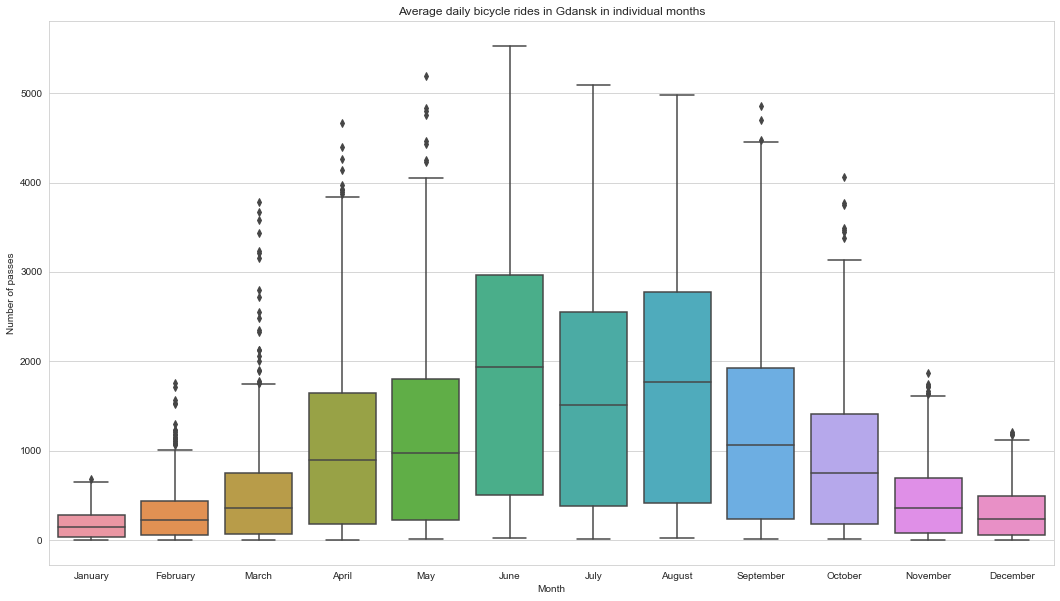

In [35]:
plt.title('Average daily bicycle rides in Gdansk in individual months')
sns.boxplot(gdansk_df.month, gdansk_df.summary)
plt.xlabel('Month')
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel('Number of passes')
plt.show()

### The sum of cyclists' journeys through the measurement loops in Gdansk on individual days and months:

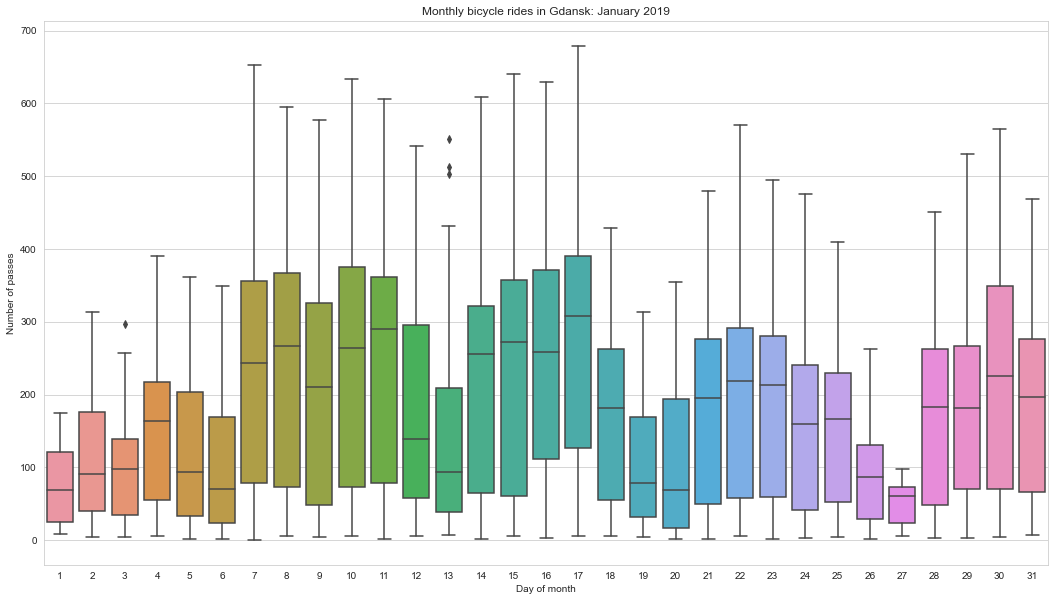

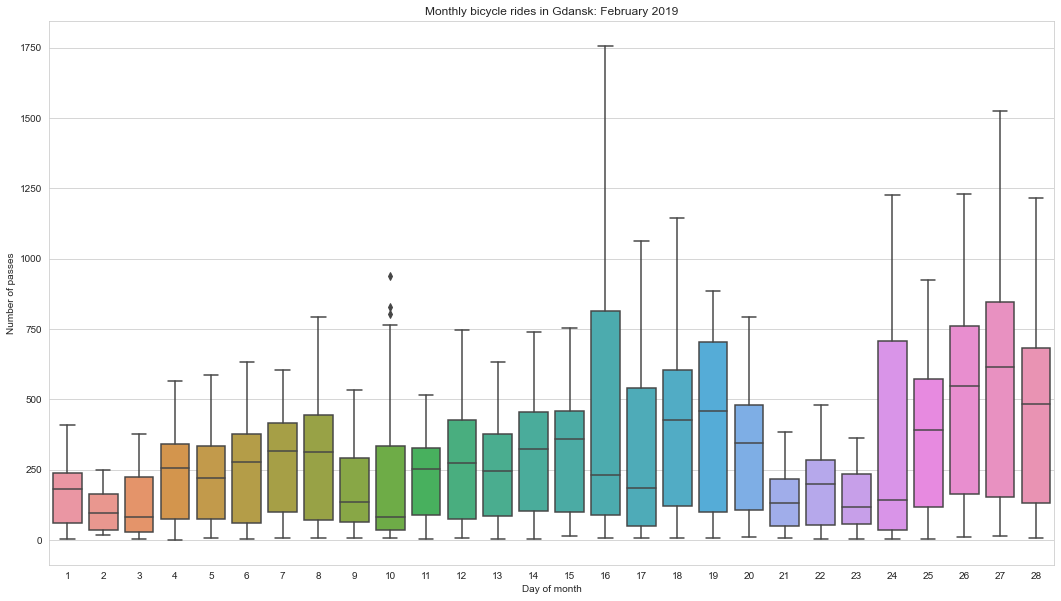

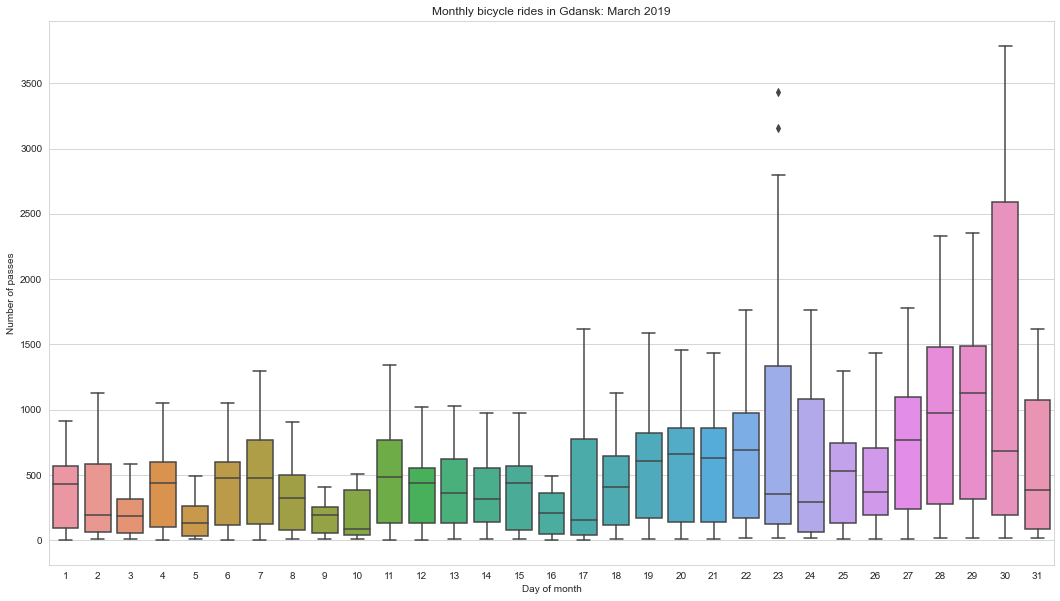

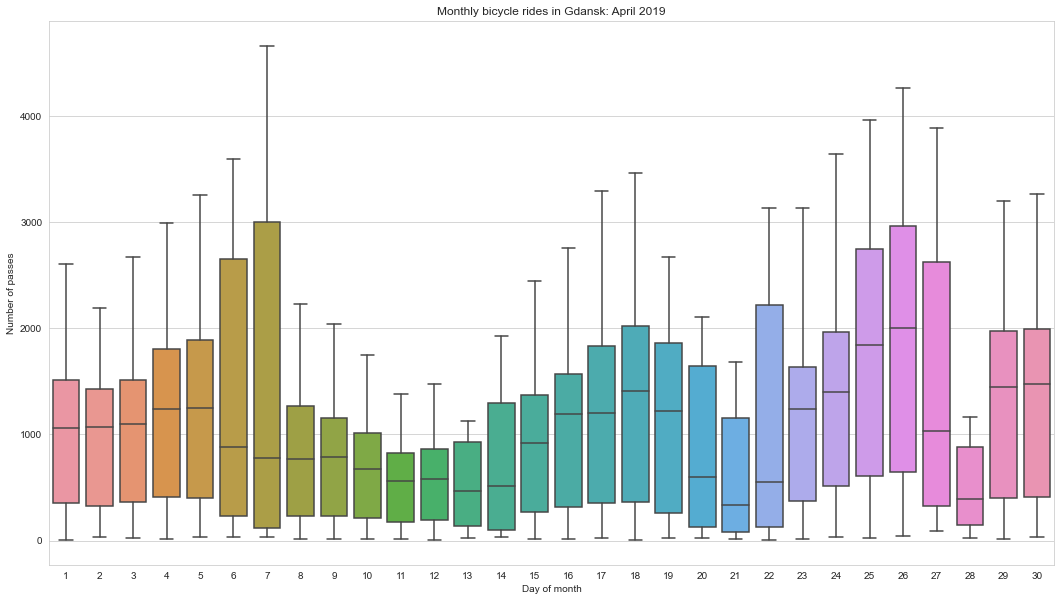

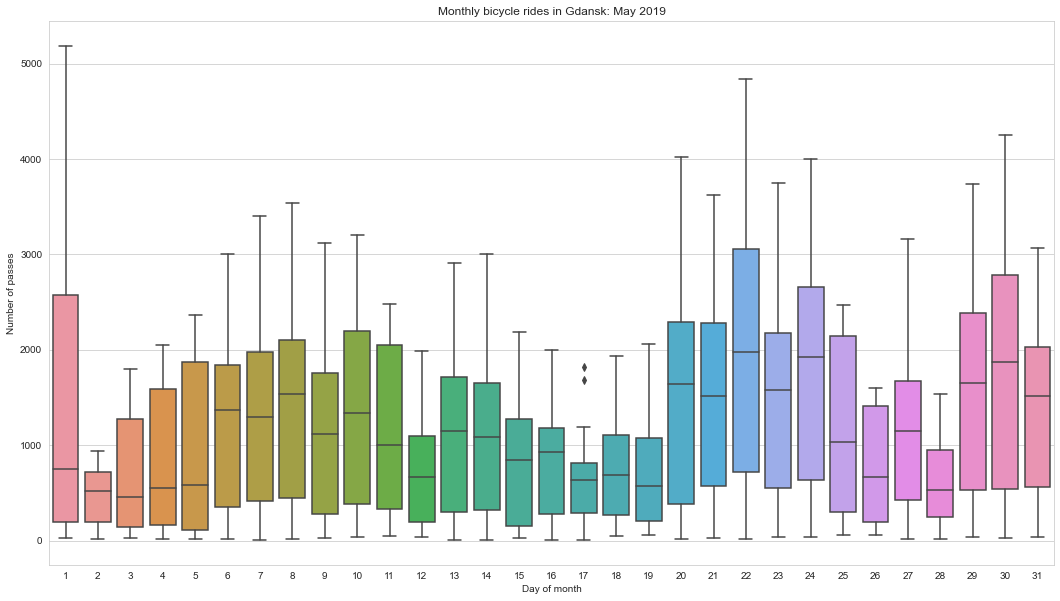

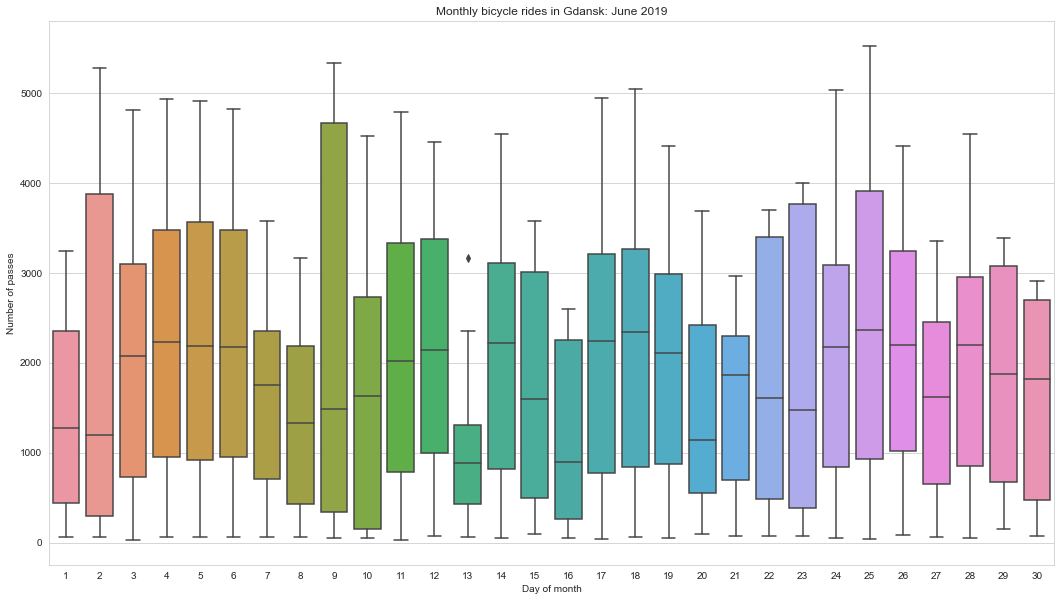

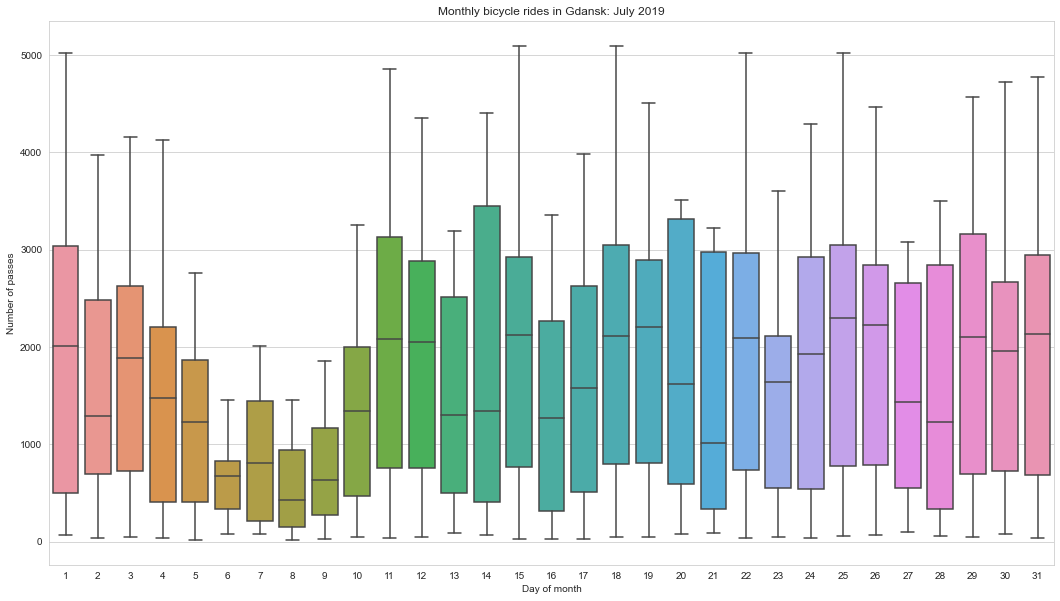

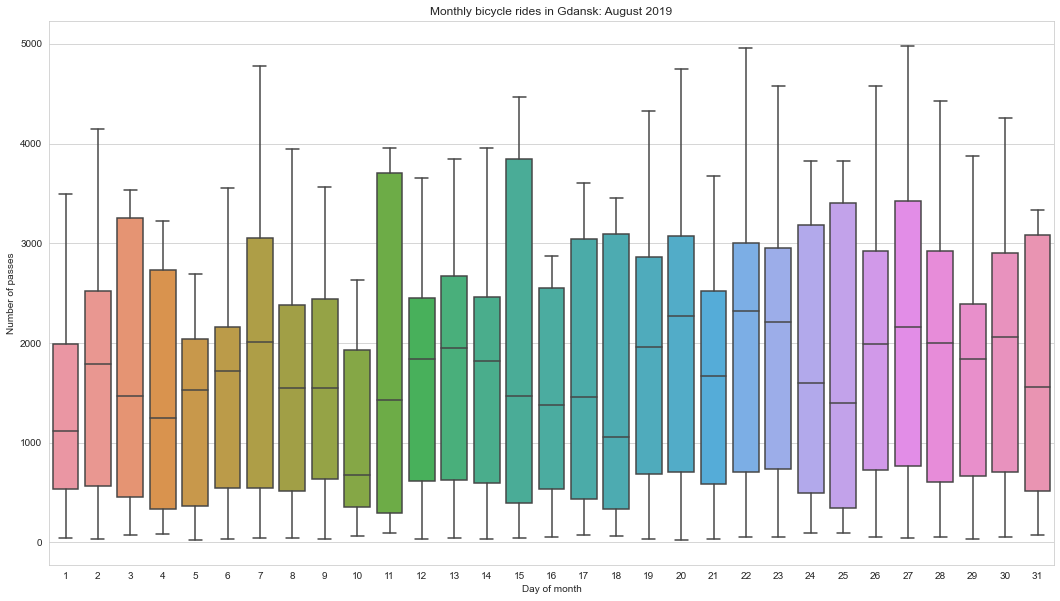

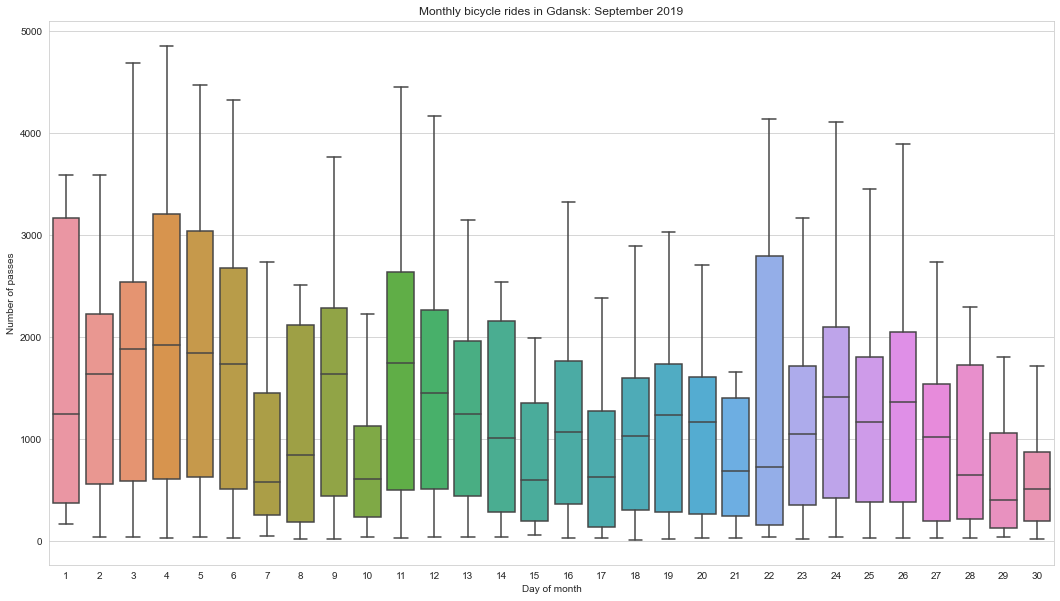

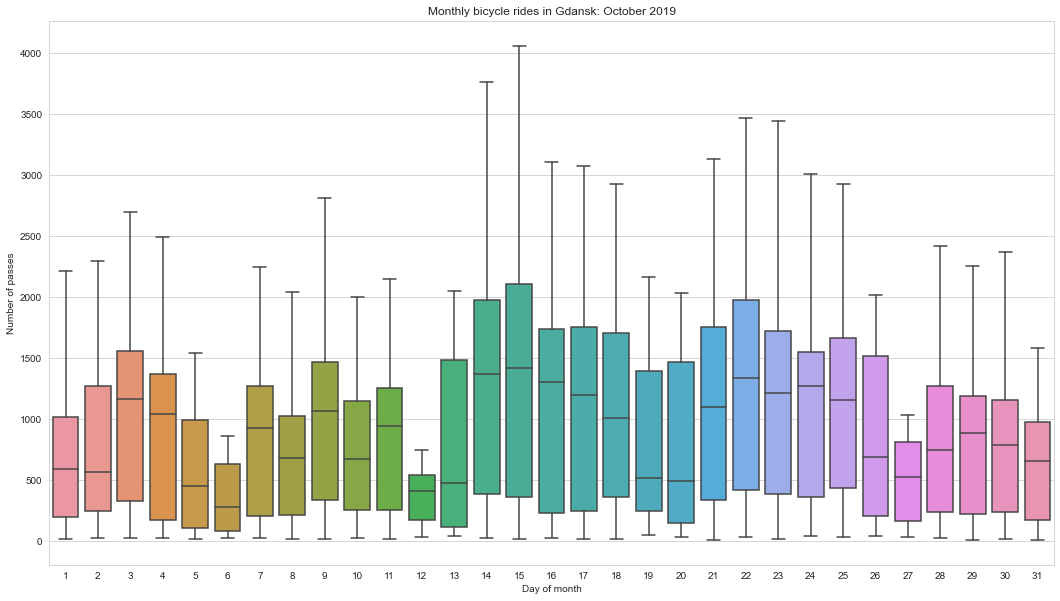

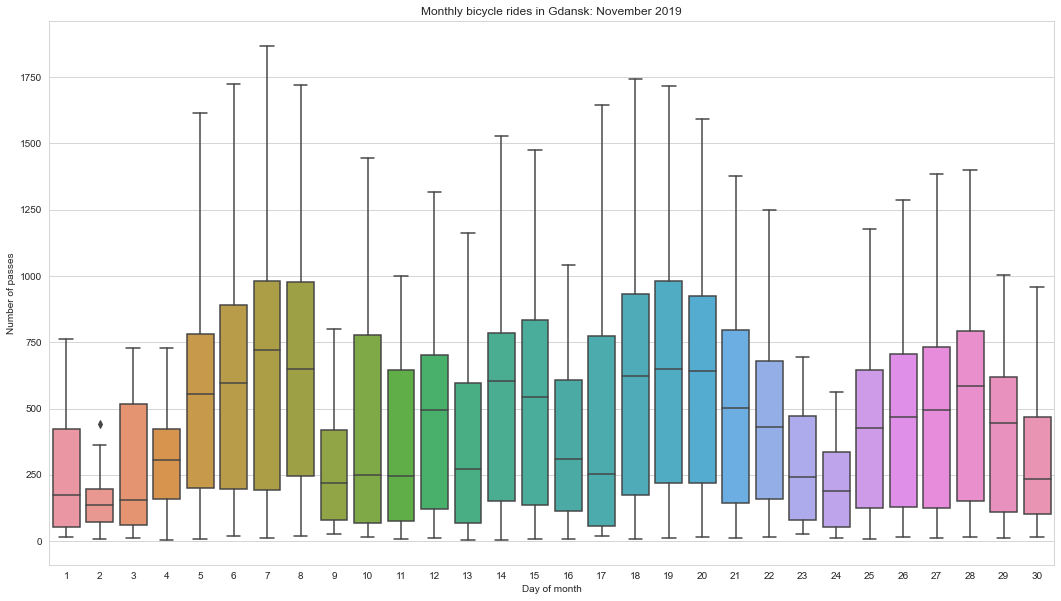

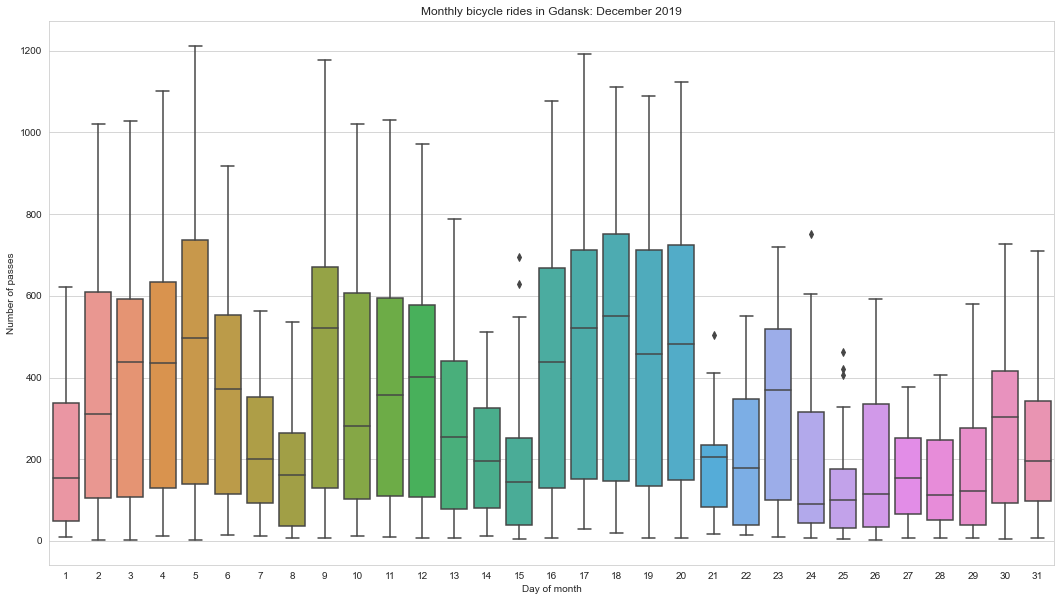

In [36]:
for i, month in zip(gdansk_df.month.unique(),gdansk_df.month_name.unique()):
    plt.title(f'Monthly bicycle rides in Gdansk: {month} 2019')
    sns.boxplot(gdansk_df[gdansk_df.month==i].day,gdansk_df.summary)
    plt.xlabel('Day of month')
    plt.ylabel('Number of passes')
    plt.show()

#### Download temperature data for comparison with the number of passes.

In [37]:
weather = pd.read_csv('data/Gdansk_DAY_weather_PCA.csv',sep=',',encoding='ansi')
weather.columns

Index(['data', 'Visibility', 'Cloud_cover', 'Wind_speed', 'Temperature',
       'Pressure', 'Precipitation', 'Insolation', 'Season', 'comp_0', 'comp_1',
       'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6'],
      dtype='object')

In [38]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           365 non-null    object 
 1   Visibility     365 non-null    float64
 2   Cloud_cover    365 non-null    float64
 3   Wind_speed     365 non-null    float64
 4   Temperature    365 non-null    float64
 5   Pressure       365 non-null    float64
 6   Precipitation  365 non-null    float64
 7   Insolation     365 non-null    float64
 8   Season         365 non-null    int64  
 9   comp_0         365 non-null    float64
 10  comp_1         365 non-null    float64
 11  comp_2         365 non-null    float64
 12  comp_3         365 non-null    float64
 13  comp_4         365 non-null    float64
 14  comp_5         365 non-null    float64
 15  comp_6         365 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 45.8+ KB


In [39]:
weather.head(3)

data    Visibility  Cloud_cover  Wind_speed  Temperature  \
0  2019-01-01  16424.041667     7.291667    6.750000     5.254167   
1  2019-01-02  13396.958333     7.000000    9.583333     1.745833   
2  2019-01-03  14534.375000     6.375000    8.083333     0.745833   

      Pressure  Precipitation  Insolation  Season    comp_0    comp_1  \
0  1003.329167       0.108333    0.008333       4  2.064953 -0.090731   
1  1010.445833       0.304167    0.000000       4  2.729497 -0.248112   
2  1023.779167       0.108333    0.037500       4  1.639283 -1.514963   

     comp_2    comp_3    comp_4    comp_5    comp_6  
0  1.730253  0.091164 -0.160534  0.207104  0.026939  
1  2.953825  1.679296  1.240689  1.201303  0.041106  
2  1.628361  1.842365  0.265598  1.065210 -0.028207

In [40]:
weather.data = pd.to_datetime(weather.data)

In [41]:
weather = weather[(weather.data.dt.year>2018)&(weather.data.dt.year<2020)]

In [42]:
weather.rename(columns={'data':'Date'},inplace=True)

In [43]:
weather.set_index('Date',inplace=True)

In [44]:
gdansk_df['Date'] = gdansk_df.index.date
gdansk_df.Date = pd.to_datetime(gdansk_df.Date)

In [45]:
merged = pd.merge(gdansk_df, weather, how='left', on="Date")
merged.rename(columns={'summary':'Journeys'},inplace=True)

In [46]:
merged

Journeys  day  hour  day_of_week day_name  month month_name       Date  \
0         86.0    1     0            1  Tuesday      1    January 2019-01-01   
1         79.0    1     1            1  Tuesday      1    January 2019-01-01   
2          8.0    1     2            1  Tuesday      1    January 2019-01-01   
3         13.0    1     3            1  Tuesday      1    January 2019-01-01   
4         20.0    1     4            1  Tuesday      1    January 2019-01-01   
...        ...  ...   ...          ...      ...    ...        ...        ...   
8755     181.0   31    19            1  Tuesday     12   December 2019-12-31   
8756     135.0   31    20            1  Tuesday     12   December 2019-12-31   
8757     105.0   31    21            1  Tuesday     12   December 2019-12-31   
8758      92.0   31    22            1  Tuesday     12   December 2019-12-31   
8759      99.0   31    23            1  Tuesday     12   December 2019-12-31   

        Visibility  Cloud_cover  ...  Precipitation  Insolation  Season  \
0     16424.041667     7.291667  ...       0.108333    0.008333       4   
1     16424.041667     7.291667  ...       0.108333    0.008333       4   
2     16424.041667     7.291667  ...       0.108333    0.008333       4   
3     16424.041667     7.291667  ...       0.108333    0.008333       4   
4     16424.041667     7.291667  ...       0.108333    0.008333       4   
...            ...          ...  ...            ...         ...     ...   
8755  20000.000000     4.166667  ...       0.000000    0.087500       4   
8756  20000.000000     4.166667  ...       0.000000    0.087500       4   
8757  20000.000000     4.166667  ...       0.000000    0.087500       4   
8758  20000.000000     4.166667  ...       0.000000    0.087500       4   
8759  20000.000000     4.166667  ...       0.000000    0.087500       4   

        comp_0    comp_1    comp_2    comp_3    comp_4    comp_5    comp_6  
0     2.064953 -0.090731  1.730253  0.091164 -0.160534  0.207104  0.026939  
1     2.064953 -0.090731  1.730253  0.091164 -0.160534  0.207104  0.026939  
2     2.064953 -0.090731  1.730253  0.091164 -0.160534  0.207104  0.026939  
3     2.064953 -0.090731  1.730253  0.091164 -0.160534  0.207104  0.026939  
4     2.064953 -0.090731  1.730253  0.091164 -0.160534  0.207104  0.026939  
...        ...       ...       ...       ...       ...       ...       ...  
8755  0.251099 -1.317303  1.776252  0.565482 -0.238698  0.109622 -0.675268  
8756  0.251099 -1.317303  1.776252  0.565482 -0.238698  0.109622 -0.675268  
8757  0.251099 -1.317303  1.776252  0.565482 -0.238698  0.109622 -0.675268  
8758  0.251099 -1.317303  1.776252  0.565482 -0.238698  0.109622 -0.675268  
8759  0.251099 -1.317303  1.776252  0.565482 -0.238698  0.109622 -0.675268  

[8760 rows x 23 columns]

In [47]:
merged.to_pickle('data/gdansk_journeys.pkl')

In [48]:
merged = merged.groupby('Date').agg({'Journeys':'sum','Visibility':'mean', 'Cloud_cover':'mean', 'Wind_speed':'mean',
       'Temperature':'mean', 'Pressure':'mean', 'Precipitation':'mean', 'Insolation':'mean',
       'comp_0':'mean', 'comp_1':'mean', 'comp_2':'mean', 'comp_3':'mean', 'comp_4':'mean', 'comp_5':'mean', 'comp_6':'mean','Season':'mean'}).reset_index()

#### Correlation map between individual data elements. 

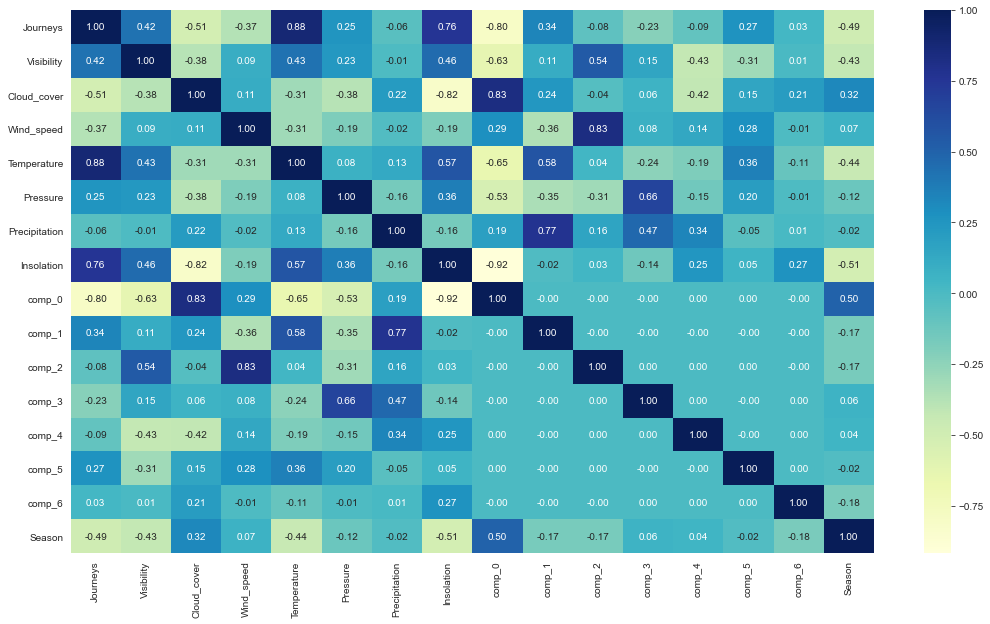

In [49]:
corr_map = sns.heatmap(merged.corr(), cmap="YlGnBu", fmt='.2f', annot = True)

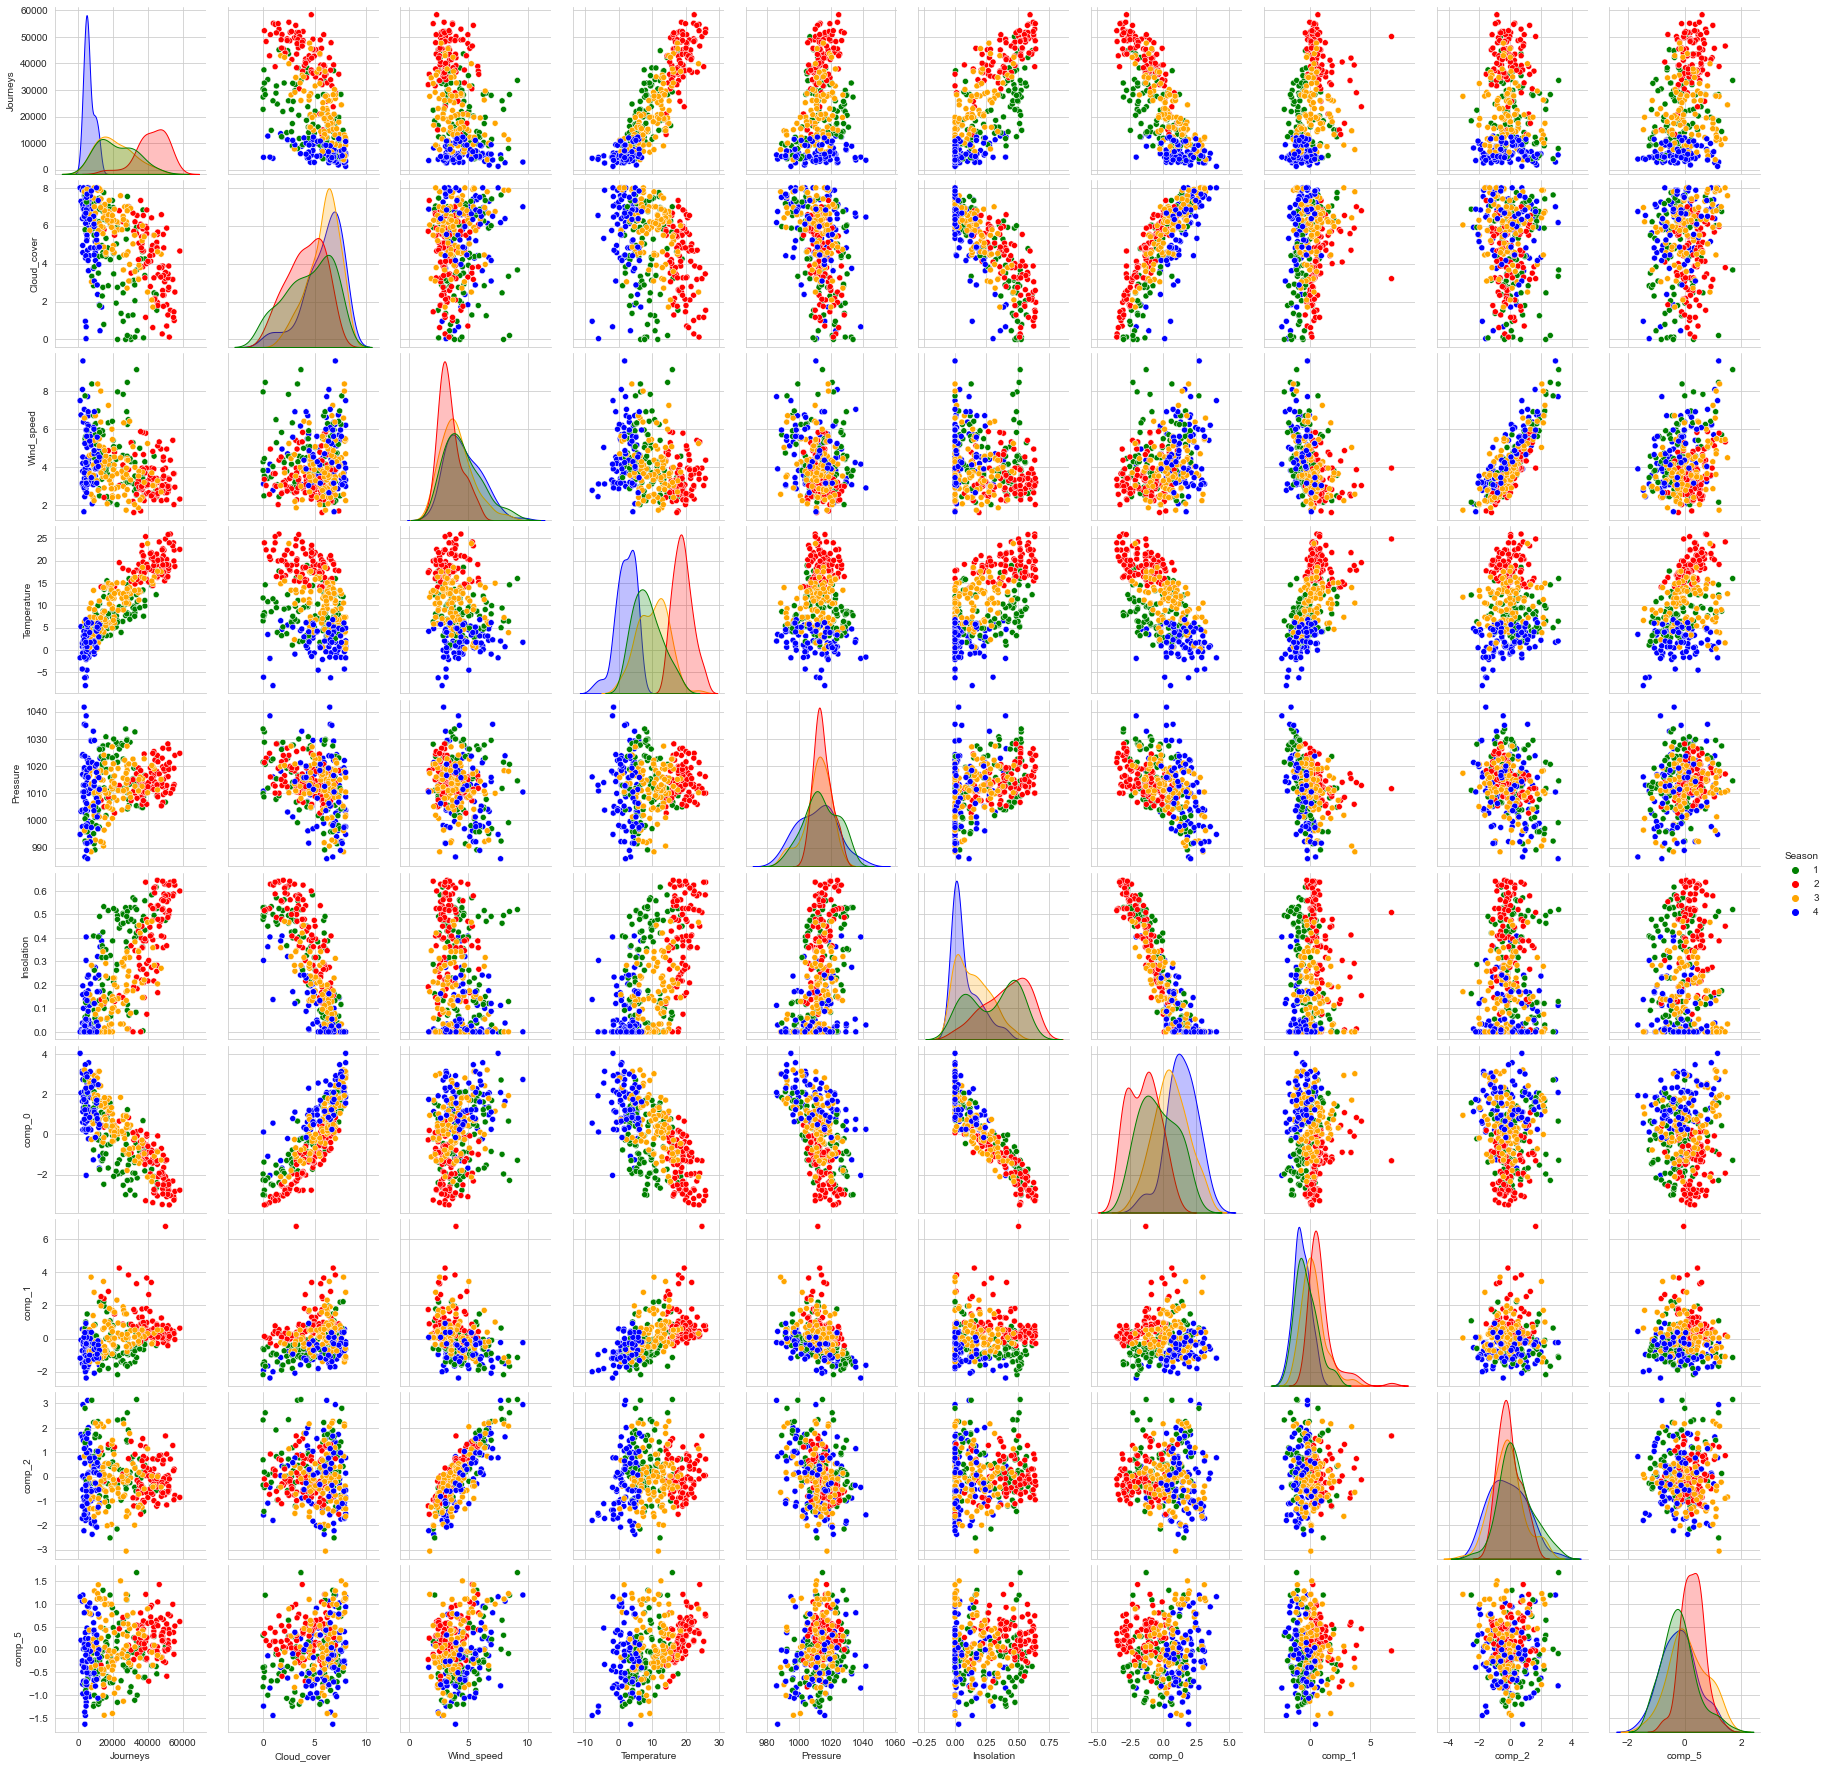

In [50]:
_=sns.pairplot(merged, vars=['Journeys','Cloud_cover',
                            'Wind_speed','Temperature','Pressure',
                            'Insolation','comp_0','comp_1','comp_2','comp_5'], hue="Season", palette=['green','red','orange','blue'])

In [51]:
gdansk_agg = merged.groupby('Date').agg({'Journeys':'sum','Temperature':'mean','Insolation':'mean','Wind_speed':'mean','comp_0':'mean','comp_2':'mean','Season':'max'}).reset_index()

In [52]:
gdansk_agg

Date  Journeys  Temperature  Insolation  Wind_speed    comp_0  \
0   2019-01-01    1709.0     5.254167    0.008333    6.750000  2.064953   
1   2019-01-02    2827.0     1.745833    0.000000    9.583333  2.729497   
2   2019-01-03    2569.0     0.745833    0.037500    8.083333  1.639283   
3   2019-01-04    3660.0     0.491667    0.000000    3.416667  1.596129   
4   2019-01-05    3117.0     3.141667    0.100000    6.375000  1.324296   
..         ...       ...          ...         ...         ...       ...   
360 2019-12-27    3938.0     3.366667    0.025000    5.250000  1.221087   
361 2019-12-28    3605.0     2.300000    0.000000    7.041667  0.749617   
362 2019-12-29    4499.0     1.758333    0.054167    4.250000  0.245561   
363 2019-12-30    6721.0     3.925000    0.000000    5.375000  0.845959   
364 2019-12-31    5814.0     6.129167    0.087500    6.916667  0.251099   

       comp_2  Season  
0    1.730253       4  
1    2.953825       4  
2    1.628361       4  
3   -0.952262       4  
4    1.473866       4  
..        ...     ...  
360  0.543475       4  
361  1.145295       4  
362 -0.362840       4  
363  0.756577       4  
364  1.776252       4  

[365 rows x 8 columns]

#### Standardization

In [53]:
stdscaler = StandardScaler()
gdansk_agg['tempscaled'] = stdscaler.fit_transform(gdansk_agg.Temperature.values.reshape(-1,1))
gdansk_agg['insolationscaled'] = stdscaler.fit_transform(gdansk_agg.Insolation.values.reshape(-1,1))
gdansk_agg['windspeedscaled'] = stdscaler.fit_transform(gdansk_agg.Wind_speed.values.reshape(-1,1))

Temperature

In [54]:
plt.title('Bicycle rides in Gdansk depending on the maximum daily temperature.', fontsize=15)
sns.scatterplot(gdansk_agg.Temperature,gdansk_agg.Journeys,hue=gdansk_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Maximum daily temperature')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

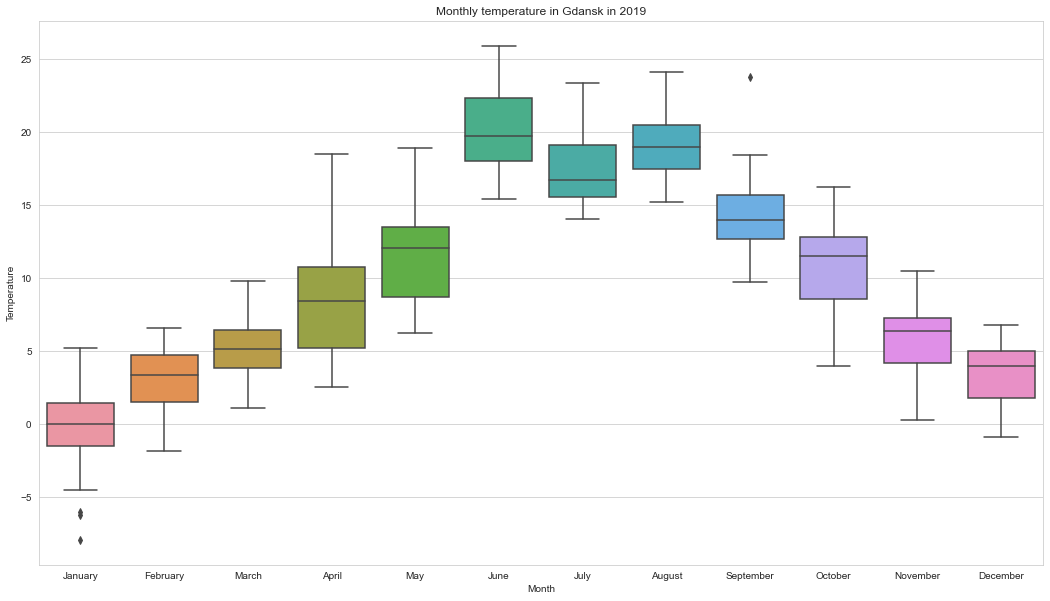

In [55]:
plt.title(f'Monthly temperature in Gdansk in 2019')
sns.boxplot(gdansk_agg.Date.dt.month,gdansk_agg.Temperature)
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

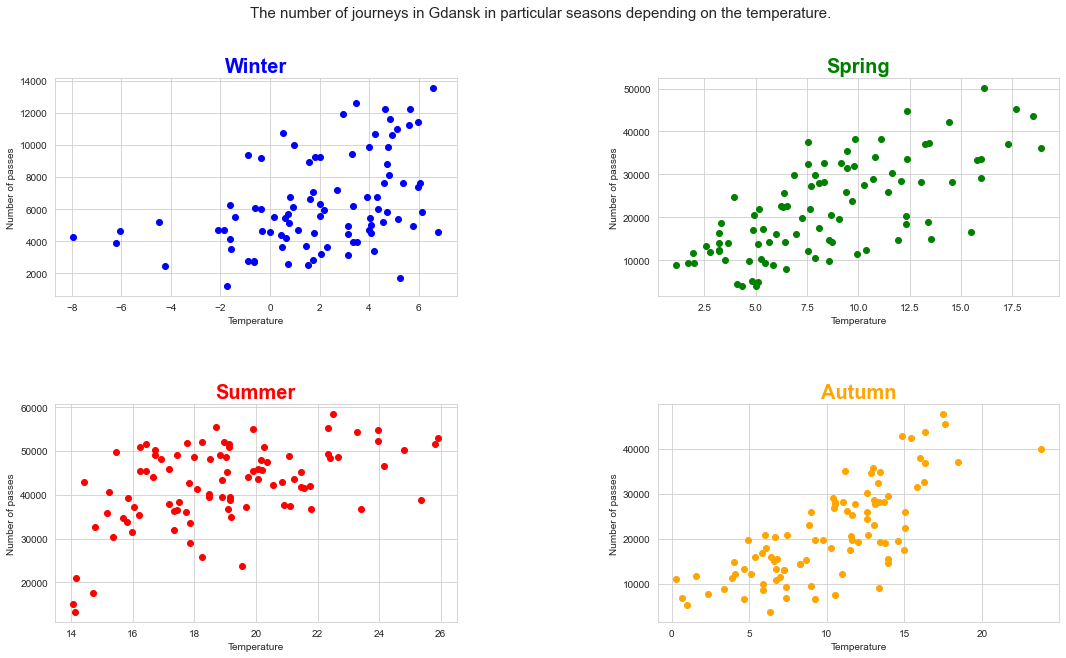

In [56]:
fontdict = {'fontsize':20,'fontweight':'bold'}
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,10]
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the temperature.', fontsize=15)

ax1 = fig.add_subplot(221)
ax1.scatter('Temperature','Journeys',data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Temperature')

ax2 = fig.add_subplot(222)
ax2.scatter('Temperature','Journeys',data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Temperature')

ax3 = fig.add_subplot(223)
ax3.scatter('Temperature','Journeys',data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Temperature')

ax4 = fig.add_subplot(224)
ax4.scatter('Temperature','Journeys',data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Temperature')
plt.show()

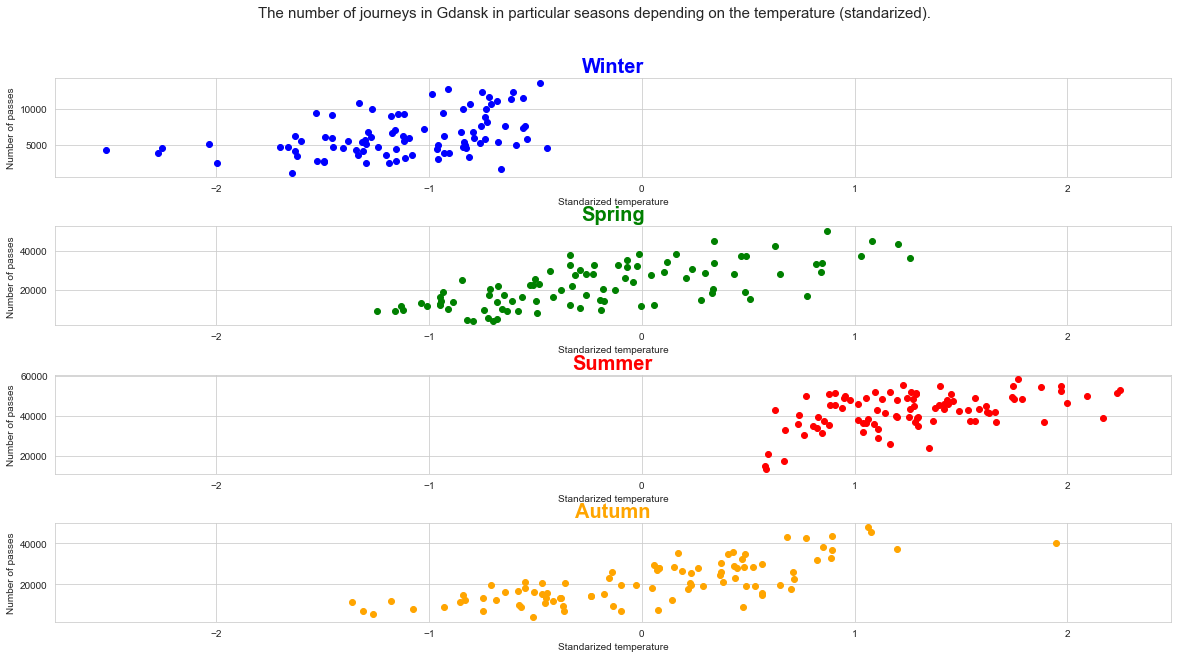

In [57]:
fig = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the temperature (standarized).', fontsize=15)

ax1 = fig.add_subplot(411)
ax1.scatter('tempscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized temperature')

ax2 = fig.add_subplot(412, sharex = ax1)
ax2.scatter('tempscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized temperature')

ax3 = fig.add_subplot(413, sharex = ax1)
ax3.scatter('tempscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized temperature')

ax4 = fig.add_subplot(414, sharex = ax1)
ax4.scatter('tempscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized temperature')
plt.show()

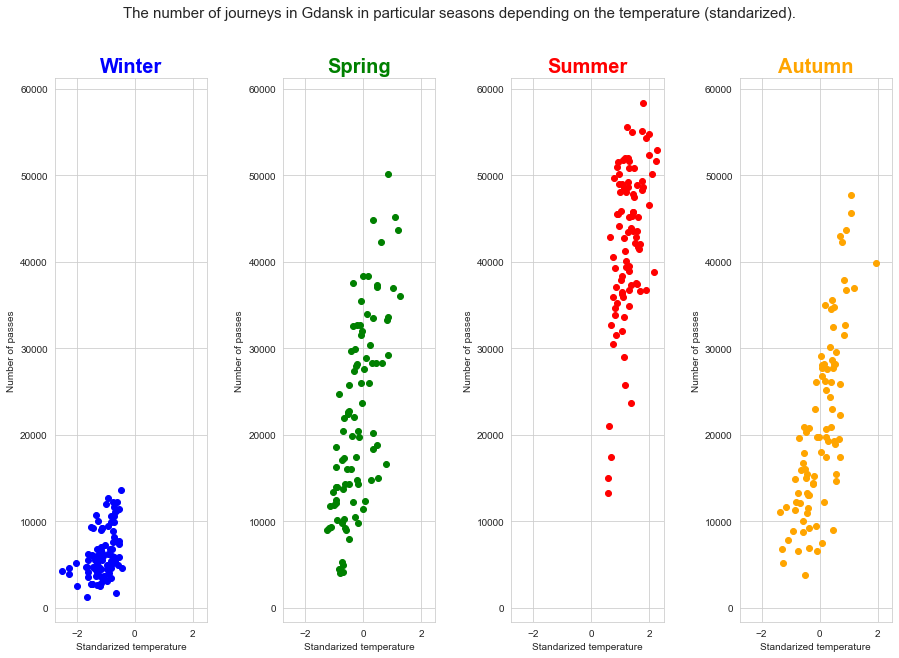

In [58]:
fig2 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the temperature (standarized).', fontsize=15)

ax1 = fig2.add_subplot(141)
ax1.scatter('tempscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized temperature')

ax2 = fig2.add_subplot(142, sharex = ax1, sharey = ax1)
ax2.scatter('tempscaled', 'Journeys',data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized temperature')

ax3 = fig2.add_subplot(143, sharex = ax1, sharey = ax1)
ax3.scatter('tempscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized temperature')

ax4 = fig2.add_subplot(144, sharex = ax1, sharey = ax1)
ax4.scatter('tempscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized temperature')
plt.show()

Conclusions:
- the number of passes is quite strongly correlated with comp_0 component (temperature is part of this element)
- the density of the timetables varies depending on the season (spring and autumn have similar distributions)

Insolation

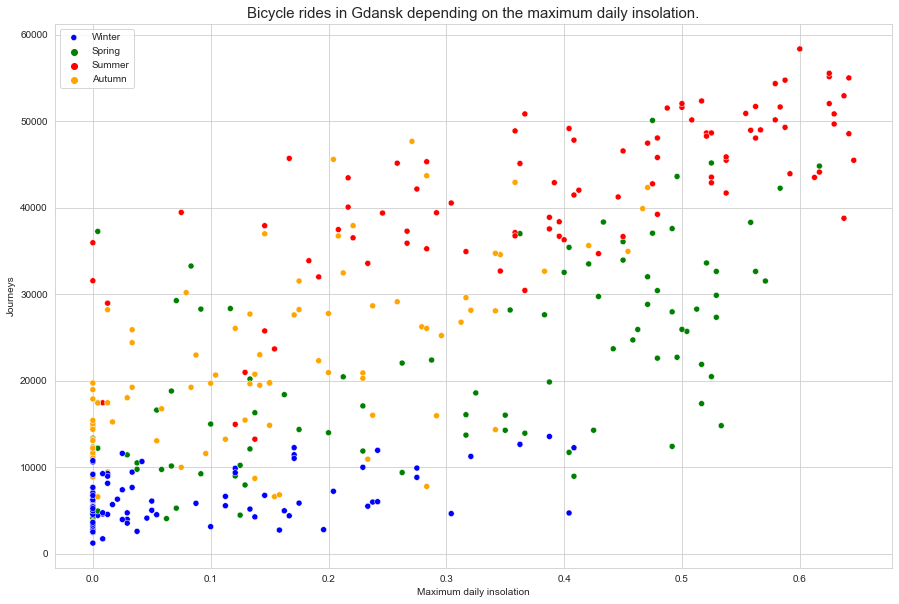

In [59]:
plt.title('Bicycle rides in Gdansk depending on the maximum daily insolation.', fontsize=15)
sns.scatterplot(gdansk_agg.Insolation,gdansk_agg.Journeys,hue=gdansk_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Maximum daily insolation')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

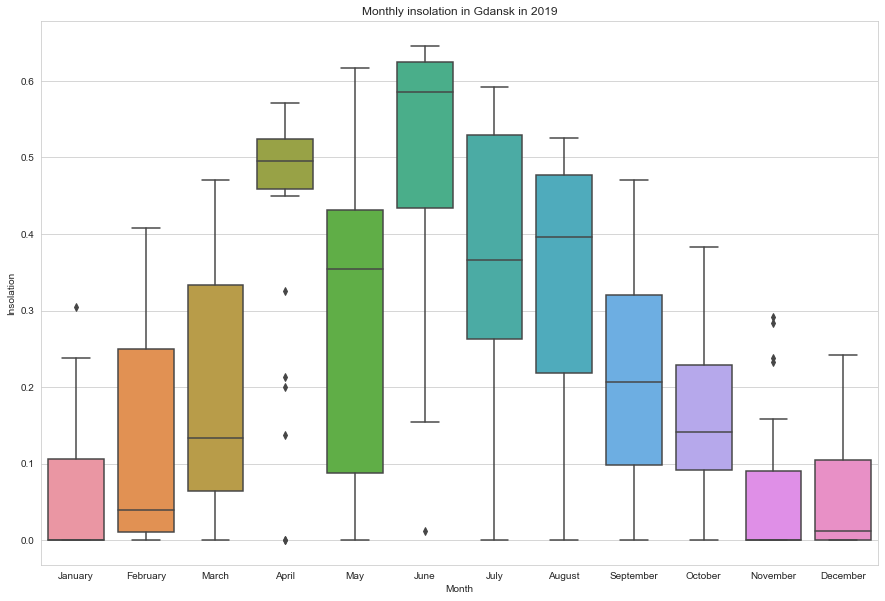

In [60]:
plt.title(f'Monthly insolation in Gdansk in 2019')
sns.boxplot(gdansk_agg.Date.dt.month,gdansk_agg.Insolation)
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Insolation')
plt.show()

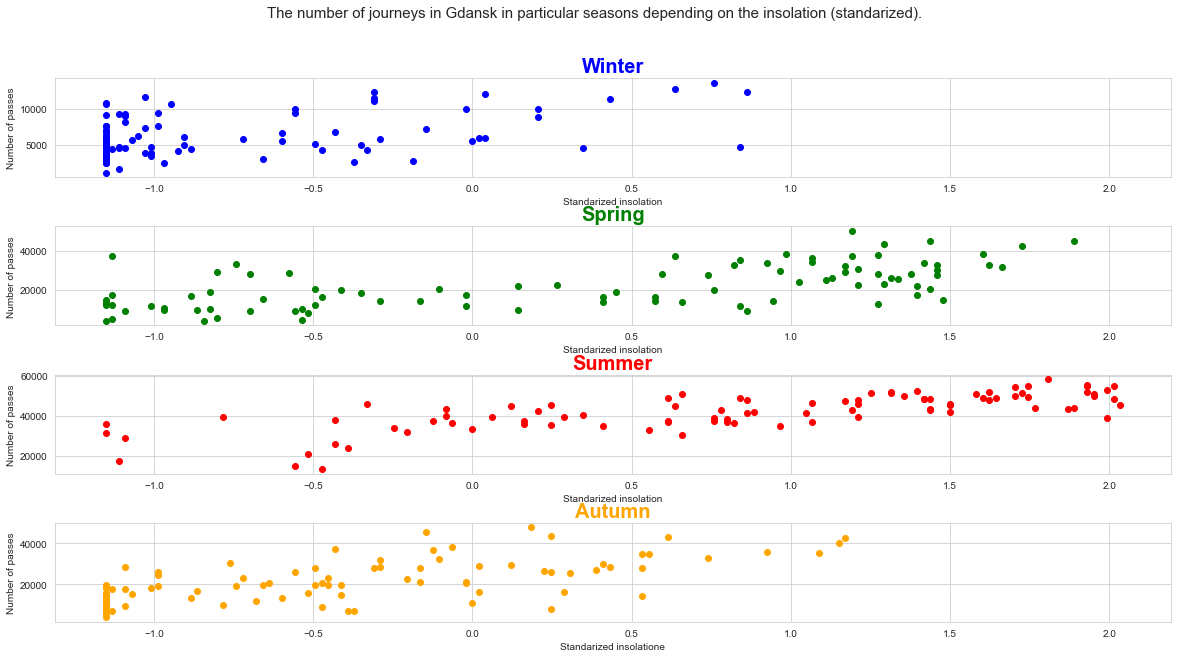

In [61]:
fig = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the insolation (standarized).', fontsize=15)

ax1 = fig.add_subplot(411)
ax1.scatter('insolationscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized insolation')

ax2 = fig.add_subplot(412, sharex = ax1)
ax2.scatter('insolationscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized insolation')

ax3 = fig.add_subplot(413, sharex = ax1)
ax3.scatter('insolationscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized insolation')

ax4 = fig.add_subplot(414, sharex = ax1)
ax4.scatter('insolationscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized insolatione')
plt.show()

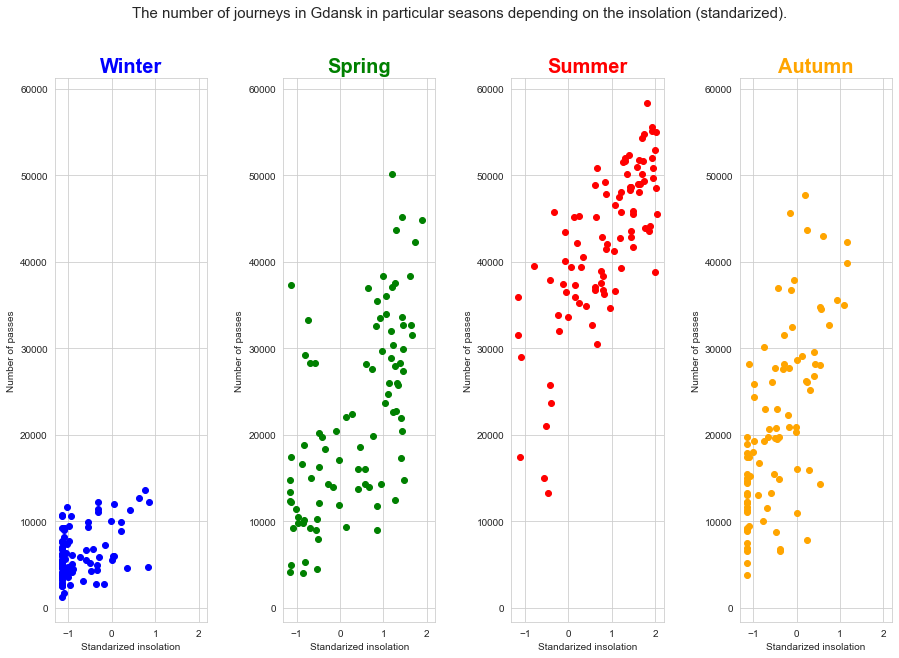

In [62]:
fig2 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the insolation (standarized).', fontsize=15)

ax1 = fig2.add_subplot(141)
ax1.scatter('insolationscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized insolation')

ax2 = fig2.add_subplot(142, sharex = ax1, sharey = ax1)
ax2.scatter('insolationscaled', 'Journeys',data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized insolation')

ax3 = fig2.add_subplot(143, sharex = ax1, sharey = ax1)
ax3.scatter('insolationscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized insolation')

ax4 = fig2.add_subplot(144, sharex = ax1, sharey = ax1)
ax4.scatter('insolationscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized insolation')
plt.show()

Wind speed

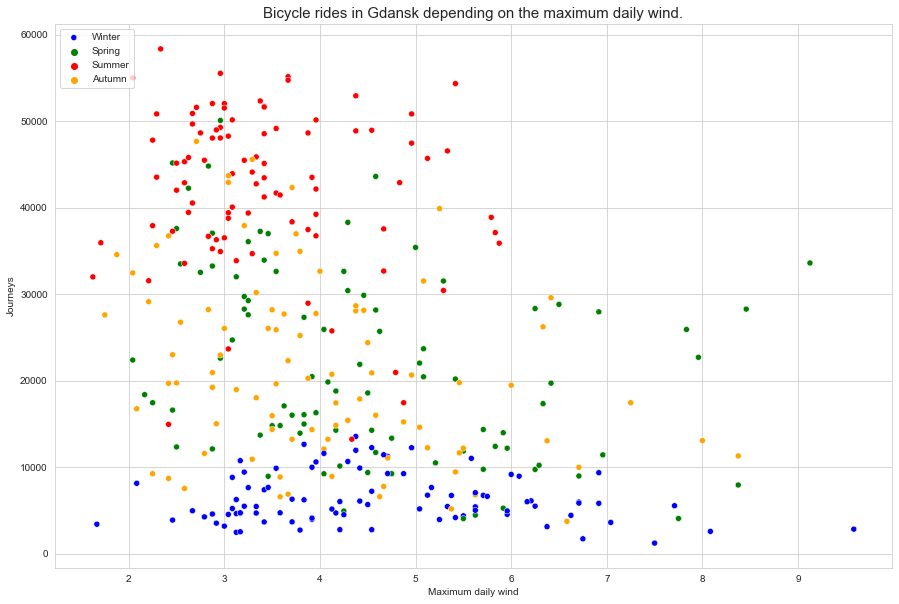

In [63]:
plt.title('Bicycle rides in Gdansk depending on the maximum daily wind.', fontsize=15)
sns.scatterplot(gdansk_agg.Wind_speed,gdansk_agg.Journeys,hue=gdansk_agg.Season, palette=['green','red','orange','blue'])
plt.xlabel('Maximum daily wind')
plt.legend(loc='upper left', labels=['Winter','Spring','Summer','Autumn'])
plt.show()

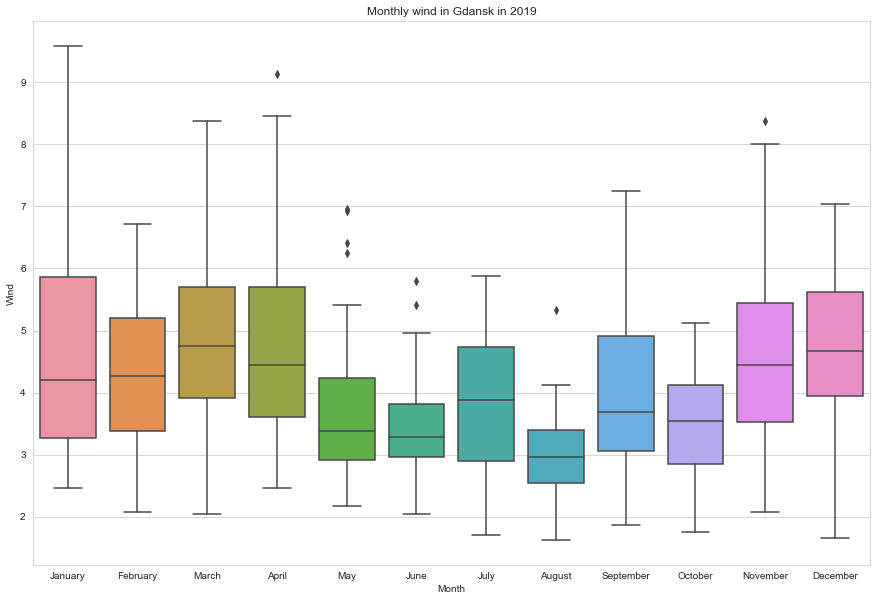

In [64]:
plt.title(f'Monthly wind in Gdansk in 2019')
sns.boxplot(gdansk_agg.Date.dt.month,gdansk_agg.Wind_speed)
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Wind')
plt.show()

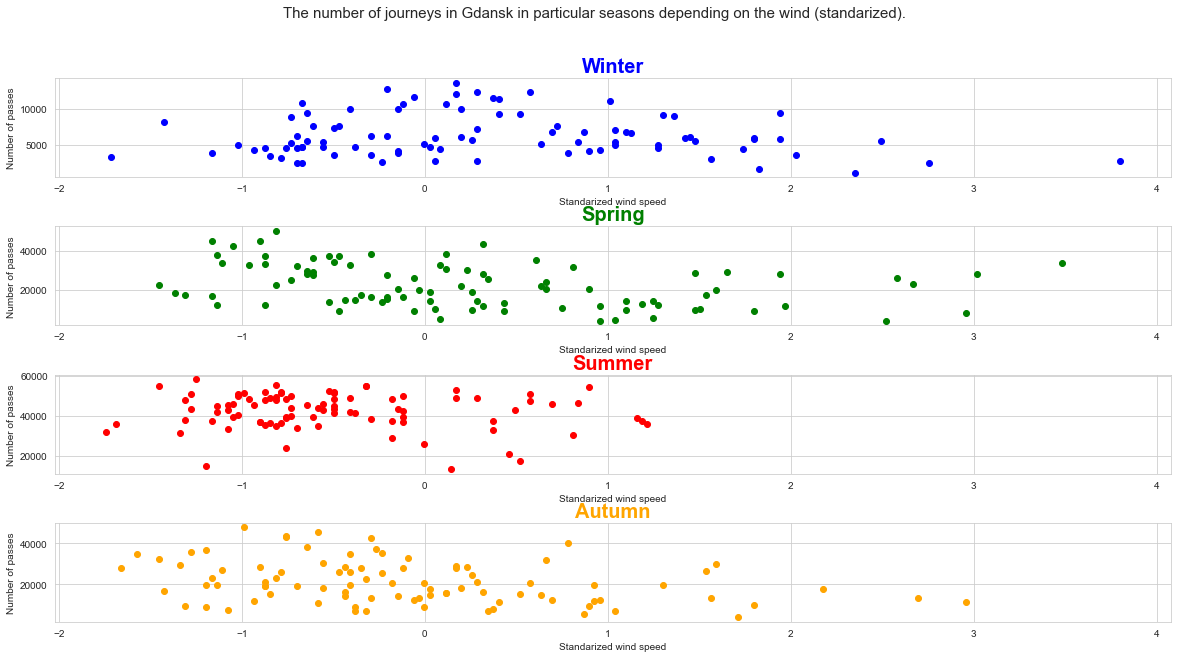

In [65]:
fig = plt.figure(figsize=[20,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the wind (standarized).', fontsize=15)

ax1 = fig.add_subplot(411)
ax1.scatter('windspeedscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized wind speed')

ax2 = fig.add_subplot(412, sharex = ax1)
ax2.scatter('windspeedscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized wind speed')

ax3 = fig.add_subplot(413, sharex = ax1)
ax3.scatter('windspeedscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized wind speed')

ax4 = fig.add_subplot(414, sharex = ax1)
ax4.scatter('windspeedscaled','Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized wind speed')
plt.show()

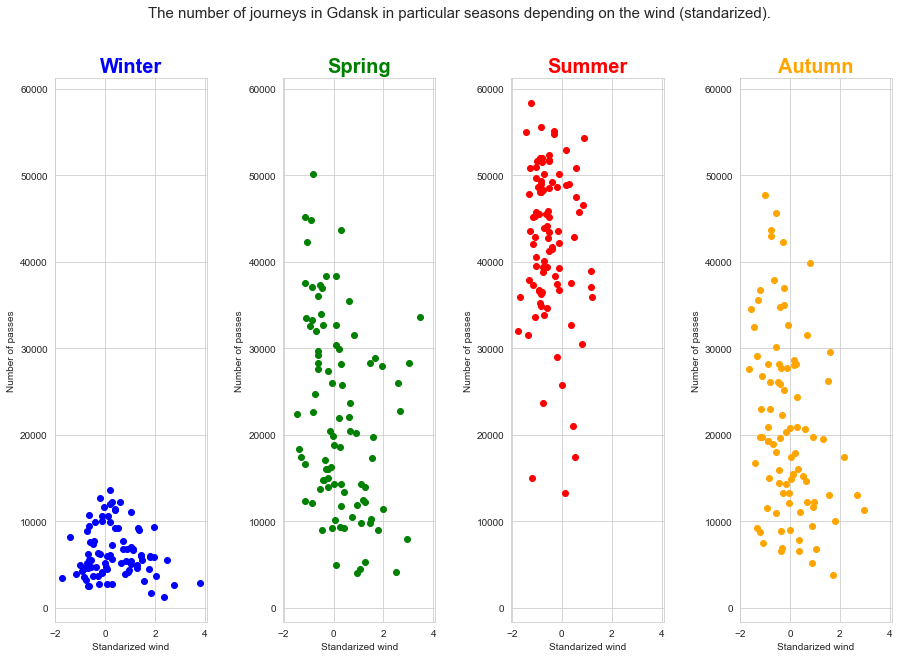

In [66]:
fig2 = plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('The number of journeys in Gdansk in particular seasons depending on the wind (standarized).', fontsize=15)

ax1 = fig2.add_subplot(141)
ax1.scatter('windspeedscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 4],c="blue")
ax1.set_title('Winter', color="blue", fontdict = fontdict)
ax1.set_ylabel('Number of passes')
ax1.set_xlabel('Standarized wind')

ax2 = fig2.add_subplot(142, sharex = ax1, sharey = ax1)
ax2.scatter('windspeedscaled', 'Journeys',data = gdansk_agg[gdansk_agg.Season == 1],c="green")
ax2.set_title('Spring', color="green", fontdict = fontdict)
ax2.set_ylabel('Number of passes')
ax2.set_xlabel('Standarized wind')

ax3 = fig2.add_subplot(143, sharex = ax1, sharey = ax1)
ax3.scatter('windspeedscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 2],c="red")
ax3.set_title('Summer', color="red", fontdict = fontdict)
ax3.set_ylabel('Number of passes')
ax3.set_xlabel('Standarized wind')

ax4 = fig2.add_subplot(144, sharex = ax1, sharey = ax1)
ax4.scatter('windspeedscaled', 'Journeys', data = gdansk_agg[gdansk_agg.Season == 3],c="orange")
ax4.set_title('Autumn', color="orange", fontdict = fontdict)
ax4.set_ylabel('Number of passes')
ax4.set_xlabel('Standarized wind')
plt.show()